**GASES DE EFECTO INVERNADERO Y CAMBIO CLIMATICO**

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from google.colab import files
import io
import pylab

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as smf
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [338]:
# FUNCION QUE CONVIERTE LA URL CRUDA DE DRIVE EN EL FORMATO CORRECTO PARA IMPORTAR CON PANDAS.

def convertir_link_a_url_directa(link_original):
    # Extraer el ID del archivo desde el enlace original
    id_archivo = link_original.split('/d/')[1].split('/')[0]

    # Crear la URL en el formato correcto
    url_correcta = f'https://drive.google.com/uc?id={id_archivo}'

    return url_correcta

In [339]:
# Lista de direcciones drive

urls = {
    'union_df':'https://drive.google.com/file/d/1PXh7AlHYfean6cbhKlBVbr4A3RVckguI/view?usp=drive_link', #union_df
    'total-ghg-emissions':'https://drive.google.com/file/d/1rONhjETOwKrqfXsy__VQm5gO9uHtxi3E/view?usp=drive_link', #total-ghg-emissions
    'population':'https://drive.google.com/file/d/1rO6yXJ-_AU8rcAV8RRus_qHvPgABnF7B/view?usp=drive_link', # population
    'per-capita-energy-use':'https://drive.google.com/file/d/1BUtMI2f5vxF0dIcWU9ZN85O_3GOId3LW/view?usp=drive_link', # per-capita-energy-use
    'number-without-electricity-by-region':'https://drive.google.com/file/d/1JlbZw8KjwImaCbQ0l_ZxFby4B555i00q/view?usp=drive_link', # number-without-electricity-by-region
    'modern-renewable-prod':'https://drive.google.com/file/d/1Q849QV3ezvwm7vpw83tC_eG__SB61xMc/view?usp=drive_link', # modern-renewable-prod
    'gas-share-energy':'https://drive.google.com/file/d/15KVWPj5LeZYPDIcp7vfDqZMYSf5Q59RX/view?usp=drive_link', # gas-share-energy
    'fossil-fuels-share-energy':'https://drive.google.com/file/d/1DNqlYZHNKNIwJ8QLbG3mxPAOtnw7Icmq/view?usp=drive_link', # fossil-fuels-share-energy
    'emisiones_gases':'https://drive.google.com/file/d/1s1e_B-yAPX2brru5jNuqqCKYcVbSkZK0/view?usp=drive_link', # emisiones_gases
    'concentracion_gases':'https://drive.google.com/file/d/1P-2aIndTNvtzUqOfqvmRyexMooPCkcrQ/view?usp=drive_link', # concentracion_gases
    'coal-energy-share':'https://drive.google.com/file/d/10w7iNHCjiupH4RtytzOTK73B2aAJFGR9/view?usp=drive_link', # coal-energy-share
    'annual-temperature-anomalies':'https://drive.google.com/file/d/13zpYEmnYibro14mVEEUYQ4paP8kymqWv/view?usp=drive_link', # annual-temperature-anomalies
    'annual-deforestation':'https://drive.google.com/file/d/13DQO0FwbmF6Yvm2JDcpRqrp0ISo6iPpf/view?usp=drive_link'  # annual-deforestation
}

urls

{'union_df': 'https://drive.google.com/file/d/1PXh7AlHYfean6cbhKlBVbr4A3RVckguI/view?usp=drive_link',
 'total-ghg-emissions': 'https://drive.google.com/file/d/1rONhjETOwKrqfXsy__VQm5gO9uHtxi3E/view?usp=drive_link',
 'population': 'https://drive.google.com/file/d/1rO6yXJ-_AU8rcAV8RRus_qHvPgABnF7B/view?usp=drive_link',
 'per-capita-energy-use': 'https://drive.google.com/file/d/1BUtMI2f5vxF0dIcWU9ZN85O_3GOId3LW/view?usp=drive_link',
 'number-without-electricity-by-region': 'https://drive.google.com/file/d/1JlbZw8KjwImaCbQ0l_ZxFby4B555i00q/view?usp=drive_link',
 'modern-renewable-prod': 'https://drive.google.com/file/d/1Q849QV3ezvwm7vpw83tC_eG__SB61xMc/view?usp=drive_link',
 'gas-share-energy': 'https://drive.google.com/file/d/15KVWPj5LeZYPDIcp7vfDqZMYSf5Q59RX/view?usp=drive_link',
 'fossil-fuels-share-energy': 'https://drive.google.com/file/d/1DNqlYZHNKNIwJ8QLbG3mxPAOtnw7Icmq/view?usp=drive_link',
 'emisiones_gases': 'https://drive.google.com/file/d/1s1e_B-yAPX2brru5jNuqqCKYcVbSkZK0/view?

In [340]:
# Conversión de direcciones a formato directo

urls_convertidas = {clave: convertir_link_a_url_directa(valor) for clave, valor in urls.items()}

urls_convertidas

{'union_df': 'https://drive.google.com/uc?id=1PXh7AlHYfean6cbhKlBVbr4A3RVckguI',
 'total-ghg-emissions': 'https://drive.google.com/uc?id=1rONhjETOwKrqfXsy__VQm5gO9uHtxi3E',
 'population': 'https://drive.google.com/uc?id=1rO6yXJ-_AU8rcAV8RRus_qHvPgABnF7B',
 'per-capita-energy-use': 'https://drive.google.com/uc?id=1BUtMI2f5vxF0dIcWU9ZN85O_3GOId3LW',
 'number-without-electricity-by-region': 'https://drive.google.com/uc?id=1JlbZw8KjwImaCbQ0l_ZxFby4B555i00q',
 'modern-renewable-prod': 'https://drive.google.com/uc?id=1Q849QV3ezvwm7vpw83tC_eG__SB61xMc',
 'gas-share-energy': 'https://drive.google.com/uc?id=15KVWPj5LeZYPDIcp7vfDqZMYSf5Q59RX',
 'fossil-fuels-share-energy': 'https://drive.google.com/uc?id=1DNqlYZHNKNIwJ8QLbG3mxPAOtnw7Icmq',
 'emisiones_gases': 'https://drive.google.com/uc?id=1s1e_B-yAPX2brru5jNuqqCKYcVbSkZK0',
 'concentracion_gases': 'https://drive.google.com/uc?id=1P-2aIndTNvtzUqOfqvmRyexMooPCkcrQ',
 'coal-energy-share': 'https://drive.google.com/uc?id=10w7iNHCjiupH4RtytzOTK73B2

In [341]:
nombres_dataframes = {
    'total-ghg-emissions': 'efecto_invernadero',
    'annual-temperature-anomalies': 'temperaturas_anuales',
    'modern-renewable-prod': 'energia_renovable',
    'annual-deforestation': 'deforestacion',
    'population': 'poblacion_mundial',
    'emisiones_gases': 'emisiones_gases',
    'per-capita-energy-use': 'uso_energia_percapita',
    'concentracion_gases': 'concentracion_gases',
    'fossil-fuels-share-energy': 'uso_comb_fosiles',
    'gas-share-energy': 'uso_gas',
    'coal-energy-share': 'uso_carbon',
    'number-without-electricity-by-region': 'personas_sin_energia'
}

nombres_dataframes

{'total-ghg-emissions': 'efecto_invernadero',
 'annual-temperature-anomalies': 'temperaturas_anuales',
 'modern-renewable-prod': 'energia_renovable',
 'annual-deforestation': 'deforestacion',
 'population': 'poblacion_mundial',
 'emisiones_gases': 'emisiones_gases',
 'per-capita-energy-use': 'uso_energia_percapita',
 'concentracion_gases': 'concentracion_gases',
 'fossil-fuels-share-energy': 'uso_comb_fosiles',
 'gas-share-energy': 'uso_gas',
 'coal-energy-share': 'uso_carbon',
 'number-without-electricity-by-region': 'personas_sin_energia'}

In [342]:
# Generamos dataframes

efecto_invernadero = pd.read_csv(urls_convertidas['total-ghg-emissions'])
temperaturas_anuales = pd.read_csv(urls_convertidas['annual-temperature-anomalies'])
energia_renovable = pd.read_csv(urls_convertidas['modern-renewable-prod'])
deforestacion = pd.read_csv(urls_convertidas['annual-deforestation'])
poblacion_mundial = pd.read_csv(urls_convertidas['population'])
emisiones_gases = pd.read_csv(urls_convertidas['emisiones_gases'])
uso_energia_percapita = pd.read_csv(urls_convertidas['per-capita-energy-use'])
concentracion_gases = pd.read_csv(urls_convertidas['concentracion_gases'])
uso_comb_fosiles = pd.read_csv(urls_convertidas['fossil-fuels-share-energy'])
uso_gas = pd.read_csv(urls_convertidas['gas-share-energy'])
uso_carbon = pd.read_csv(urls_convertidas['coal-energy-share'])
personas_sin_energia = pd.read_csv(urls_convertidas['number-without-electricity-by-region'])

# INFO DATASETS CARGADOS #
**efecto_invernadero**: Las emisiones de gases de efecto invernadero incluyen dióxido de carbono, metano y óxido nitroso de todas las fuentes, incluido el cambio de uso del suelo. Se miden en toneladas de equivalentes de dióxido de carbono durante una escala de tiempo de 100 años.
Date range: 1850–2023
Unit: tonnes of CO₂ equivalents.
**GHG** son las siglas de Greenhouse Gas (gases de efecto invernadero)


**temperaturas_anuales** : La desviación de la temperatura de superficie promedio de un año específico de la media de 1991-2020, en grados centígrados.

**energia_renovable:** generacion moderna de energía renovable por fuente, mundo medido en Terawatt-Hours.

**deforestacion:** Hectáreas anuales de tasa de deforestación por año.

**poblacion_mundial:** Millones a billones de personas.

**emisiones_gases**: estan en tonelas de gases.

**uso_energia_percapita:**Uso de energía por persona medida en kilovatios-hora por persona. Aquí, la energía se refiere a la energía primaria utilizando el método de sustitución.

**concentracion_gases:** La concentración se mide en partes por millón (ppm).

# EDA DE LOS DATAFRAME

In [343]:
efecto_invernadero.tail(3)

,Entity,Code,Year,annual_emissions_ghg_total_co2eq
37407,Zimbabwe,ZWE,2021,33549390.0
37408,Zimbabwe,ZWE,2022,33772416.0
37409,Zimbabwe,ZWE,2023,33955148.0


In [344]:
# Cambiar el nombres columnas
efecto_invernadero.rename(columns={'annual_emissions_ghg_total_co2eq': 'Greenhouse_Gas(tn)'}, inplace=True)

# Borrar columnas:
efecto_invernadero = efecto_invernadero.drop(columns=['Code'])

In [345]:
efecto_invernadero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              37410 non-null  object 
 1   Year                37410 non-null  int64  
 2   Greenhouse_Gas(tn)  37410 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 876.9+ KB


In [346]:
energia_renovable.tail(4)

,Entity,Code,Year,wind_generation__twh,hydro_generation__twh,solar_generation__twh,other_renewables_including_bioenergy_generation__twh
9204,Zimbabwe,ZWE,2019,0.0,4.17,0.03,0.19
9205,Zimbabwe,ZWE,2020,0.0,3.81,0.02,0.10
9206,Zimbabwe,ZWE,2021,0.0,5.93,0.02,0.00
9207,Zimbabwe,ZWE,2022,0.0,5.88,0.03,0.10


In [347]:
# Cambiar el nombres columnas
energia_renovable.rename(columns={'wind_generation__twh': 'wind(TWh)'}, inplace=True)
energia_renovable.rename(columns={'hydro_generation__twh': 'hydro(TWh)'}, inplace=True)
energia_renovable.rename(columns={'solar_generation__twh': 'solar(TWh)'}, inplace=True)
energia_renovable.rename(columns={'other_renewables_including_bioenergy_generation__twh': 'other(bioenergy)(TWh)'}, inplace=True)

# Borrar columnas:
energia_renovable = energia_renovable.drop(columns=['Code'])

In [348]:
energia_renovable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9208 entries, 0 to 9207
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 9208 non-null   object 
 1   Year                   9208 non-null   int64  
 2   wind(TWh)              8235 non-null   float64
 3   hydro(TWh)             9061 non-null   float64
 4   solar(TWh)             8203 non-null   float64
 5   other(bioenergy)(TWh)  8427 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 431.8+ KB


In [349]:
deforestacion.tail()

,Entity,Code,Year,Deforestation
490,Zambia,ZMB,2015,189710.0
491,Zimbabwe,ZWE,1990,46070.0
492,Zimbabwe,ZWE,2000,46070.0
493,Zimbabwe,ZWE,2010,46070.0
494,Zimbabwe,ZWE,2015,46070.0


In [350]:
# Cambiar el nombres columnas
deforestacion.rename(columns={'Deforestation': 'Deforestation(Ha)'}, inplace=True)

# Borrar columnas:
deforestacion = deforestacion.drop(columns=['Code'])

In [351]:
deforestacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             495 non-null    object 
 1   Year               495 non-null    int64  
 2   Deforestation(Ha)  495 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.7+ KB


In [352]:
poblacion_mundial

,Entity,Year,Population - Sex: all - Age: all - Variant: estimates
0,Afghanistan,1950,7776182
1,Afghanistan,1951,7879343
2,Afghanistan,1952,7987783
3,Afghanistan,1953,8096703
4,Afghanistan,1954,8207953
...,...,...,...
18939,Zimbabwe,2019,15271377
18940,Zimbabwe,2020,15526888
18941,Zimbabwe,2021,15797220
18942,Zimbabwe,2022,16069061


In [353]:
# Cambiar el nombres columnas para poblacion_mundial
poblacion_mundial.rename(columns={'Population - Sex: all - Age: all - Variant: estimates': 'Population'}, inplace=True)

In [354]:
poblacion_mundial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Entity      18944 non-null  object
 1   Year        18944 non-null  int64 
 2   Population  18944 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 444.1+ KB


In [355]:
concentracion_gases.head(5)

,Entity,Day,n2o_concentration,n2o_concentration_yearly_average,ch4_concentration,ch4_concentration_yearly_average,co2_concentration,co2_concentration_yearly_average
0,World,1979-01-15,NaN,NaN,NaN,NaN,336.56,NaN
1,World,1979-02-15,NaN,NaN,NaN,NaN,337.29,NaN
2,World,1979-03-15,NaN,NaN,NaN,NaN,337.88,NaN
3,World,1979-04-15,NaN,NaN,NaN,NaN,338.32,NaN
4,World,1979-05-15,NaN,NaN,NaN,NaN,338.26,NaN


In [356]:
# Borrar columnas específicas #
concentracion_gases = concentracion_gases.drop(columns=['n2o_concentration_yearly_average', 'ch4_concentration_yearly_average','co2_concentration_yearly_average'])

In [357]:
# Cambiar el nombres columnas para concentracion_gases:
concentracion_gases.rename(columns={'Day': 'Year'}, inplace=True)
concentracion_gases.rename(columns={'n2o_concentration': 'concentration_n2o(ppm)'}, inplace=True)
concentracion_gases.rename(columns={'ch4_concentration': 'concentration_ch4(ppm)'}, inplace=True)
concentracion_gases.rename(columns={'co2_concentration': 'concentration_co2(ppm)'}, inplace=True)

In [358]:
concentracion_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  550 non-null    object 
 1   Year                    550 non-null    object 
 2   concentration_n2o(ppm)  285 non-null    float64
 3   concentration_ch4(ppm)  495 non-null    float64
 4   concentration_co2(ppm)  550 non-null    float64
dtypes: float64(3), object(2)
memory usage: 21.6+ KB


In [359]:
#### Limpiezaa del dataset "concentracion_gases"#####

# Verificar el formato original de la columna 'Year'
print(concentracion_gases['Year'].head())

# Convertir la columna 'Year' a tipo de fecha
if concentracion_gases['Year'].dtype != 'int64':
    concentracion_gases['Year'] = pd.to_datetime(concentracion_gases['Year'], errors='coerce')

# Extraer solo el año y convertirlo a entero
concentracion_gases['Year'] = concentracion_gases['Year'].dt.year  #Year en este dataframe tenia año, mes y dia. Esto complica al ahora de hacer analisis y graficos. Se cambio a solo años (por año habra 12 filas correspondiente a los 12 meses del año).

# Revisar el resultado
print(concentracion_gases['Year'].unique())  # Siirve para mostrar los años únicos en la columna y que siga el orden original de los años.
concentracion_gases.info()

0    1979-01-15
1    1979-02-15
2    1979-03-15
3    1979-04-15
4    1979-05-15
Name: Year, dtype: object
[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  550 non-null    object 
 1   Year                    550 non-null    int32  
 2   concentration_n2o(ppm)  285 non-null    float64
 3   concentration_ch4(ppm)  495 non-null    float64
 4   concentration_co2(ppm)  550 non-null    float64
dtypes: float64(3), int32(1), object(1)
memory usage: 19.5+ KB


In [360]:
concentracion_gases

,Entity,Year,concentration_n2o(ppm),concentration_ch4(ppm),concentration_co2(ppm)
0,World,1979,NaN,NaN,336.56
1,World,1979,NaN,NaN,337.29
2,World,1979,NaN,NaN,337.88
3,World,1979,NaN,NaN,338.32
4,World,1979,NaN,NaN,338.26
...,...,...,...,...,...
545,World,2024,337.70,1921.77,423.21
546,World,2024,337.67,1921.03,421.52
547,World,2024,337.64,1926.83,420.03
548,World,2024,337.72,1936.64,420.25


In [361]:
emisiones_gases.head(3)

,Entity,Year,co2,n2o,ch4,so2
0,Afghanistan,1950,84272.0,2238381.0,8100568.5,748.6191
1,Afghanistan,1951,91600.0,2299787.2,8233321.0,767.4483
2,Afghanistan,1952,91600.0,2373210.5,8372900.5,778.1855


In [362]:
# Cambiar el nombres columnas para emisiones_gases:
emisiones_gases.rename(columns={'co2': 'emision_co2(Tn)'}, inplace=True)
emisiones_gases.rename(columns={'n2o': 'emision_n2o(Tn)'}, inplace=True)
emisiones_gases.rename(columns={'ch4': 'emision__ch4(Tn)'}, inplace=True)
emisiones_gases.rename(columns={'so2': 'emision__so2(Tn)'}, inplace=True)

In [363]:
emisiones_gases.head()

,Entity,Year,emision_co2(Tn),emision_n2o(Tn),emision__ch4(Tn),emision__so2(Tn)
0,Afghanistan,1950,84272.0,2238381.0,8100568.5,748.6191
1,Afghanistan,1951,91600.0,2299787.2,8233321.0,767.4483
2,Afghanistan,1952,91600.0,2373210.5,8372900.5,778.1855
3,Afghanistan,1953,106256.0,2454824.2,8528310.0,816.0000
4,Afghanistan,1954,106256.0,2540803.5,8690891.0,838.3837


In [364]:
emisiones_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19218 entries, 0 to 19217
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            19218 non-null  object 
 1   Year              19218 non-null  int64  
 2   emision_co2(Tn)   17300 non-null  float64
 3   emision_n2o(Tn)   16280 non-null  float64
 4   emision__ch4(Tn)  15910 non-null  float64
 5   emision__so2(Tn)  16790 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 901.0+ KB


In [365]:
temperaturas_anuales.head()

,Entity,Code,Year,temperature_anomaly
0,Afghanistan,AFG,1940,-1.202316
1,Afghanistan,AFG,1941,0.794745
2,Afghanistan,AFG,1942,0.355437
3,Afghanistan,AFG,1943,-1.005242
4,Afghanistan,AFG,1944,-0.386346


In [366]:
# Cambiar el nombres columnas para temperaturas_anuales:
temperaturas_anuales.rename(columns={'temperature_anomaly': 'T(°C)'}, inplace=True)

# Borrar columnas:
temperaturas_anuales = temperaturas_anuales.drop(columns=['Code'])

In [367]:
temperaturas_anuales.tail()

,Entity,Year,T(°C)
16570,Zimbabwe,2020,0.229293
16571,Zimbabwe,2021,0.016838
16572,Zimbabwe,2022,0.035659
16573,Zimbabwe,2023,0.792851
16574,Zimbabwe,2024,1.364956


In [368]:
temperaturas_anuales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16575 entries, 0 to 16574
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  16575 non-null  object 
 1   Year    16575 non-null  int64  
 2   T(°C)   16575 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 388.6+ KB


In [369]:
uso_energia_percapita.head()

,Entity,Code,Year,primary_energy_consumption_per_capita__kwh
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290


In [370]:
# Cambiar el nombres columnas para uso_energia_percapit:
uso_energia_percapita.rename(columns={'primary_energy_consumption_per_capita__kwh': 'consumo_energia(kwh)'}, inplace=True)

# Borrar columnas:
uso_energia_percapita = uso_energia_percapita.drop(columns=['Code'])

In [371]:
uso_energia_percapita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10694 entries, 0 to 10693
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                10694 non-null  object 
 1   Year                  10694 non-null  int64  
 2   consumo_energia(kwh)  10694 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 250.8+ KB


In [372]:
uso_comb_fosiles.head(2)

,Entity,Code,Year,fossil_fuels__pct_equivalent_primary_energy
0,Africa,NaN,1965,94.25971
1,Africa,NaN,1966,93.88603


In [373]:
# Cambiar el nombres columnas para uso_comb_fosiles:
uso_comb_fosiles.rename(columns={'fossil_fuels__pct_equivalent_primary_energy': 'consumo_comb_fosiles(%)'}, inplace=True)

# Borrar columnas:
#uso_comb_fosiles = uso_comb_fosiles.drop(columns=['Code'])

In [374]:
uso_carbon.tail(2)

,Entity,Code,Year,coal__pct_equivalent_primary_energy
4901,World,OWID_WRL,2022,26.595697
4902,World,OWID_WRL,2023,26.472912


In [375]:
# Cambiar el nombres columnas para uso_carbon:
uso_carbon.rename(columns={'coal__pct_equivalent_primary_energy': 'consumo_carbon(%)'}, inplace=True)

# Borrar columnas:
uso_carbon = uso_carbon.drop(columns=['Code'])

In [376]:
uso_gas.head(2)

,Entity,Code,Year,gas__pct_equivalent_primary_energy
0,Africa,NaN,1965,1.336263
1,Africa,NaN,1966,1.426159


In [377]:
# Cambiar el nombres columnas para uso_gas:
uso_gas.rename(columns={'gas__pct_equivalent_primary_energy': 'consumo_gas(%)'}, inplace=True)

# Borrar columnas:
uso_gas = uso_gas.drop(columns=['Code'])

In [378]:
personas_sin_energia.head(2)

,Entity,Code,Year,Number of people without access to electricity
0,Afghanistan,AFG,2005,19934584.60
1,Afghanistan,AFG,2006,19005378.68


In [379]:
# Cambiar el nombres columnas para personas_sin_energia:
personas_sin_energia.rename(columns={'Number of people without access to electricity': 'Personas_sin_electricidad'}, inplace=True)

# Borrar columnas:
personas_sin_energia = personas_sin_energia.drop(columns=['Code'])

# **UNION DE DATASETS (CREACION DE UNION_DF)**

In [380]:
### UNION ###

# Lista de DataFrames
dataframes = [efecto_invernadero, temperaturas_anuales, energia_renovable, deforestacion,
              poblacion_mundial, emisiones_gases, uso_energia_percapita, concentracion_gases,
              uso_comb_fosiles, uso_gas, uso_carbon, personas_sin_energia]

# Unir los DataFrames usando merge iterativo
union_df = dataframes[0]
for df in dataframes[1:]:
    union_df = pd.merge(union_df, df, on=['Entity', 'Year'], how='outer')

# Verificar las primeras filas del DataFrame unificado
print(union_df.head(2))


          Entity  Year  Greenhouse_Gas(tn)  T(°C)  wind(TWh)  hydro(TWh)  \
0  ASEAN (Ember)  2000                 NaN    NaN        0.0       50.45   
1  ASEAN (Ember)  2001                 NaN    NaN        0.0       54.33   

   solar(TWh)  other(bioenergy)(TWh)  Deforestation(Ha)  Population  ...  \
0         0.0                  22.80                NaN         NaN  ...   
1         0.0                  22.86                NaN         NaN  ...   

   emision__so2(Tn)  consumo_energia(kwh)  concentration_n2o(ppm)  \
0               NaN                   NaN                     NaN   
1               NaN                   NaN                     NaN   

   concentration_ch4(ppm)  concentration_co2(ppm)  Code  \
0                     NaN                     NaN   NaN   
1                     NaN                     NaN   NaN   

   consumo_comb_fosiles(%)  consumo_gas(%) consumo_carbon(%)  \
0                      NaN             NaN               NaN   
1                      NaN  

In [381]:
union_df.head(3)

,Entity,Year,Greenhouse_Gas(tn),T(°C),wind(TWh),hydro(TWh),solar(TWh),other(bioenergy)(TWh),Deforestation(Ha),Population,...,emision__so2(Tn),consumo_energia(kwh),concentration_n2o(ppm),concentration_ch4(ppm),concentration_co2(ppm),Code,consumo_comb_fosiles(%),consumo_gas(%),consumo_carbon(%),Personas_sin_electricidad
0,ASEAN (Ember),2000,NaN,NaN,0.0,50.45,0.0,22.80,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASEAN (Ember),2001,NaN,NaN,0.0,54.33,0.0,22.86,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASEAN (Ember),2002,NaN,NaN,0.0,53.29,0.0,23.23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
### Eliminar filas que no sirven en el dataset ###

# Eliminar filas donde la columna 'Entity' comienza con "ASEAN (Ember)"
union_df = union_df[~union_df['Entity'].str.startswith("ASEAN (Ember)")]

# Reiniciar el índice del DataFrame
union_df.reset_index(drop=True, inplace=True)

print(union_df.head(2))


        Entity  Year  Greenhouse_Gas(tn)  T(°C)  wind(TWh)  hydro(TWh)  \
0  Afghanistan  1850           7435743.5    NaN        NaN         NaN   
1  Afghanistan  1851           7499858.5    NaN        NaN         NaN   

   solar(TWh)  other(bioenergy)(TWh)  Deforestation(Ha)  Population  ...  \
0         NaN                    NaN                NaN         NaN  ...   
1         NaN                    NaN                NaN         NaN  ...   

   emision__so2(Tn)  consumo_energia(kwh)  concentration_n2o(ppm)  \
0               NaN                   NaN                     NaN   
1               NaN                   NaN                     NaN   

   concentration_ch4(ppm)  concentration_co2(ppm)  Code  \
0                     NaN                     NaN   NaN   
1                     NaN                     NaN   NaN   

   consumo_comb_fosiles(%)  consumo_gas(%) consumo_carbon(%)  \
0                      NaN             NaN               NaN   
1                      NaN        

In [383]:
union_df.head(5)

,Entity,Year,Greenhouse_Gas(tn),T(°C),wind(TWh),hydro(TWh),solar(TWh),other(bioenergy)(TWh),Deforestation(Ha),Population,...,emision__so2(Tn),consumo_energia(kwh),concentration_n2o(ppm),concentration_ch4(ppm),concentration_co2(ppm),Code,consumo_comb_fosiles(%),consumo_gas(%),consumo_carbon(%),Personas_sin_electricidad
0,Afghanistan,1850,7435743.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,7499858.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,7560495.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,7619898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,7678120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45793 entries, 0 to 45792
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     45793 non-null  object 
 1   Year                       45793 non-null  int64  
 2   Greenhouse_Gas(tn)         37905 non-null  float64
 3   T(°C)                      17079 non-null  float64
 4   wind(TWh)                  8706 non-null   float64
 5   hydro(TWh)                 9532 non-null   float64
 6   solar(TWh)                 8674 non-null   float64
 7   other(bioenergy)(TWh)      8898 non-null   float64
 8   Deforestation(Ha)          539 non-null    float64
 9   Population                 19439 non-null  float64
 10  emision_co2(Tn)            17795 non-null  float64
 11  emision_n2o(Tn)            16775 non-null  float64
 12  emision__ch4(Tn)           16405 non-null  float64
 13  emision__so2(Tn)           17274 non-null  flo

In [385]:
## Guardar el DataFrame resultante en un archivo CSV

#union_df.to_csv('union_df.csv', index=False) #index=False: Este argumento evita que se guarde el índice del DataFrame como una columna en el archivo CSV.

## Lo descargo de la carpeta del directorio de COLAB.

# **Posibles objetivos y preguntas a responder sobre nuestras variables**

**Agregar o modificar si es necesario**






¿Cuál es la relación entre el consumo de energía y las emisiones de CO₂?

¿Cómo se correlaciona la contribución de los países al cambio climático con sus emisiones de gases de efecto invernadero?

¿Relacion entre la temperatura y los paises que utilizan energias renovables y no renovables?

¿Que relaciones hay entre la poblacion de los paises y sus emisiones de gases?

¿Como se relaciona la deforestacion con las demas variables?

**ANALISIS Y PREDICCIONES POSIBLES**
----

**Relaciones y Correlaciones**

Correlación entre emisiones de gases y temperatura: Examinar si hay una relación lineal entre las emisiones de gases y las anomalias de temperatura.
Asi mismo la relacion con la concentraciones de gases en la atmosfera.
                                                      

Consumo de energia y emisiones de gases: Analizar cómo diferentes tipos de energía (renovable vs. no renovable) se correlacionan con las emisiones de gases.

Ver si hay relaciones entre la cantidad de poblaciones de paises con sus emisiones, con la deforestacion, etc.
variables socioeconómicas (incorporar como datos adicionales, si es necesario: acceso a la electricidad, pobreza, etc).

-------


**Modelos y Análisis**

Regresión Lineal Múltiple: Usar regresión lineal para predecir las emisiones de gases basándote en el tipo de energía utilizada, el acceso a la electricidad, y la temperatura media.


Análisis de Componentes Principales (PCA): Reducir la dimensionalidad de tus datos para identificar las variables que más influyen en las emisiones de gases.

Modelos de Series Temporales: Si tengo datos temporales, podria construir modelos de series temporales para predecir tendencias futuras en temperatura y emisiones.

------

**Objetivos Potenciales (Posibles predicciones, intentar hacer)**

Predecir la Temperatura Futura: Utilizar datos históricos para construir un modelo que prediga la temperatura en diferentes regiones en los próximos años.

Evaluar el Impacto de Políticas Energéticas: Analizar cómo el cambio en el tipo de energía utilizada (por ejemplo, aumento de renovables) afecta las emisiones de gases.

Optimización del Acceso a la Electricidad: Usar técnicas de aprendizaje automático para identificar regiones con menor acceso a la electricidad y proponer soluciones basadas en patrones.

# **EDA y Graficos**

In [386]:
union_df.head(1)

,Entity,Year,Greenhouse_Gas(tn),T(°C),wind(TWh),hydro(TWh),solar(TWh),other(bioenergy)(TWh),Deforestation(Ha),Population,...,emision__so2(Tn),consumo_energia(kwh),concentration_n2o(ppm),concentration_ch4(ppm),concentration_co2(ppm),Code,consumo_comb_fosiles(%),consumo_gas(%),consumo_carbon(%),Personas_sin_electricidad
0,Afghanistan,1850,7435743.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [387]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45793 entries, 0 to 45792
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     45793 non-null  object 
 1   Year                       45793 non-null  int64  
 2   Greenhouse_Gas(tn)         37905 non-null  float64
 3   T(°C)                      17079 non-null  float64
 4   wind(TWh)                  8706 non-null   float64
 5   hydro(TWh)                 9532 non-null   float64
 6   solar(TWh)                 8674 non-null   float64
 7   other(bioenergy)(TWh)      8898 non-null   float64
 8   Deforestation(Ha)          539 non-null    float64
 9   Population                 19439 non-null  float64
 10  emision_co2(Tn)            17795 non-null  float64
 11  emision_n2o(Tn)            16775 non-null  float64
 12  emision__ch4(Tn)           16405 non-null  float64
 13  emision__so2(Tn)           17274 non-null  flo

In [388]:
# Convirtamos a numerico las variables que corresponden

# Excluir las columnas 'Entity' y 'Year'
columns_to_exclude = ['Entity', 'Year']
columns_to_convert = [col for col in union_df.columns if col not in columns_to_exclude]

# Convertir las columnas seleccionadas a numérico
union_df[columns_to_convert] = union_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')  #La opción errors='coerce' garantiza que cualquier valor no convertible se convertirá en NaN.

# Verificar las primeras filas del DataFrame para asegurarte de que la conversión se realizó correctamente
print(union_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45793 entries, 0 to 45792
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     45793 non-null  object 
 1   Year                       45793 non-null  int64  
 2   Greenhouse_Gas(tn)         37905 non-null  float64
 3   T(°C)                      17079 non-null  float64
 4   wind(TWh)                  8706 non-null   float64
 5   hydro(TWh)                 9532 non-null   float64
 6   solar(TWh)                 8674 non-null   float64
 7   other(bioenergy)(TWh)      8898 non-null   float64
 8   Deforestation(Ha)          539 non-null    float64
 9   Population                 19439 non-null  float64
 10  emision_co2(Tn)            17795 non-null  float64
 11  emision_n2o(Tn)            16775 non-null  float64
 12  emision__ch4(Tn)           16405 non-null  float64
 13  emision__so2(Tn)           17274 non-null  flo

In [389]:
# Contar los NaN en el DataFrame

na_count = union_df.isna().sum()  #isna().sum() lo uso para obtener un conteo de los valores NaN en cada columna del DataFrame.
print("Conteo de NaN en cada columna:")
print(na_count)

Conteo de NaN en cada columna:
Entity                           0
Year                             0
Greenhouse_Gas(tn)            7888
T(°C)                        28714
wind(TWh)                    37087
hydro(TWh)                   36261
solar(TWh)                   37119
other(bioenergy)(TWh)        36895
Deforestation(Ha)            45254
Population                   26354
emision_co2(Tn)              27998
emision_n2o(Tn)              29018
emision__ch4(Tn)             29388
emision__so2(Tn)             28519
consumo_energia(kwh)         34604
concentration_n2o(ppm)       45508
concentration_ch4(ppm)       45298
concentration_co2(ppm)       45243
Code                         45793
consumo_comb_fosiles(%)      40395
consumo_gas(%)               40395
consumo_carbon(%)            40395
Personas_sin_electricidad    38969
dtype: int64


In [390]:
######
# Pensar que hacer con los NaN que hay en mucha cantidad.
# Los NaN se multiplicaron cuando se unieron los dataset, porque varios comienzan desde fechas distintas (ej: 1850, 1940, 1950, 2000).

# Podria filtrar el dataframe desde una fecha mas acorde a todos los dataframe, por ejemplo desde 1940.

In [391]:
# Filtrar el DataFrame para que incluya solo los datos a partir de 1940
union_df_filtrado = union_df[union_df['Year'] >= 1940]

# Reiniciar el índice del DataFrame
union_df_filtrado.reset_index(drop=True, inplace=True)

# Verificar las primeras filas del DataFrame filtrado para asegurarte de que la filtración se realizó correctamente
print(union_df_filtrado.head(2))

        Entity  Year  Greenhouse_Gas(tn)     T(°C)  wind(TWh)  hydro(TWh)  \
0  Afghanistan  1940          16025580.0 -1.202316        NaN         NaN   
1  Afghanistan  1941          16266986.0  0.794745        NaN         NaN   

   solar(TWh)  other(bioenergy)(TWh)  Deforestation(Ha)  Population  ...  \
0         NaN                    NaN                NaN         NaN  ...   
1         NaN                    NaN                NaN         NaN  ...   

   emision__so2(Tn)  consumo_energia(kwh)  concentration_n2o(ppm)  \
0               NaN                   NaN                     NaN   
1               NaN                   NaN                     NaN   

   concentration_ch4(ppm)  concentration_co2(ppm)  Code  \
0                     NaN                     NaN   NaN   
1                     NaN                     NaN   NaN   

   consumo_comb_fosiles(%)  consumo_gas(%)  consumo_carbon(%)  \
0                      NaN             NaN                NaN   
1                      

In [392]:
union_df_filtrado.head(2)

,Entity,Year,Greenhouse_Gas(tn),T(°C),wind(TWh),hydro(TWh),solar(TWh),other(bioenergy)(TWh),Deforestation(Ha),Population,...,emision__so2(Tn),consumo_energia(kwh),concentration_n2o(ppm),concentration_ch4(ppm),concentration_co2(ppm),Code,consumo_comb_fosiles(%),consumo_gas(%),consumo_carbon(%),Personas_sin_electricidad
0,Afghanistan,1940,16025580.0,-1.202316,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1941,16266986.0,0.794745,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [393]:
# Contar los NaN en el DataFrame

na_count = union_df_filtrado.isna().sum()  #isna().sum() lo uso para obtener un conteo de los valores NaN en cada columna del DataFrame.
print("Conteo de NaN en cada columna:")
print(na_count)

Conteo de NaN en cada columna:
Entity                           0
Year                             0
Greenhouse_Gas(tn)            7888
T(°C)                         9364
wind(TWh)                    17737
hydro(TWh)                   16911
solar(TWh)                   17769
other(bioenergy)(TWh)        17545
Deforestation(Ha)            25904
Population                    7004
emision_co2(Tn)               8648
emision_n2o(Tn)               9668
emision__ch4(Tn)             10038
emision__so2(Tn)              9169
consumo_energia(kwh)         15254
concentration_n2o(ppm)       26158
concentration_ch4(ppm)       25948
concentration_co2(ppm)       25893
Code                         26443
consumo_comb_fosiles(%)      21045
consumo_gas(%)               21045
consumo_carbon(%)            21045
Personas_sin_electricidad    19619
dtype: int64


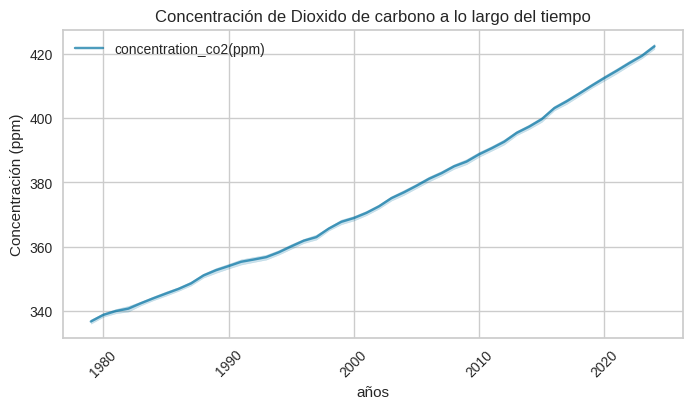

In [394]:
#### Grafico de lineas para la concentración de gases de efecto invernadero a lo largo del tiempo ###

# Convierto la variable 'Year' a formato de fecha:
#union_df_filtrado['Year'] = pd.to_datetime(union_df_filtrado['Year'])

#Diseñoo de grafico:
plt.figure(figsize=(8, 4))
sns.lineplot(data=union_df_filtrado, x='Year', y='concentration_co2(ppm)', label='concentration_co2(ppm)', alpha=0.7)


plt.title('Concentración de Dioxido de carbono a lo largo del tiempo')
plt.xlabel('años')
plt.ylabel('Concentración (ppm)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

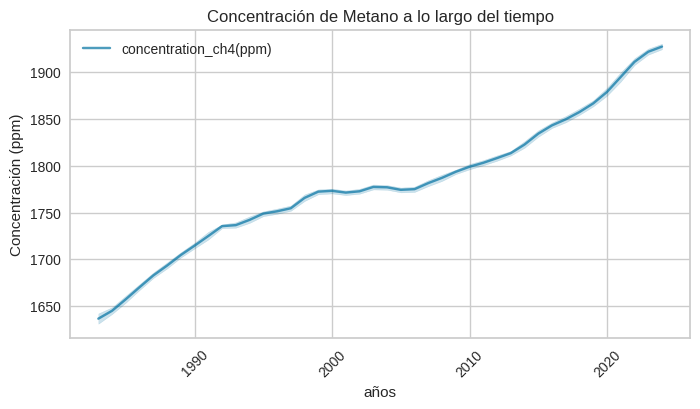

In [395]:
#Diseñoo de grafico:
plt.figure(figsize=(8, 4))
sns.lineplot(data=union_df_filtrado, x='Year', y='concentration_ch4(ppm)', label='concentration_ch4(ppm)', alpha=0.7)


plt.title('Concentración de Metano a lo largo del tiempo')
plt.xlabel('años')
plt.ylabel('Concentración (ppm)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [396]:
union_df_filtrado.head(1)

,Entity,Year,Greenhouse_Gas(tn),T(°C),wind(TWh),hydro(TWh),solar(TWh),other(bioenergy)(TWh),Deforestation(Ha),Population,...,emision__so2(Tn),consumo_energia(kwh),concentration_n2o(ppm),concentration_ch4(ppm),concentration_co2(ppm),Code,consumo_comb_fosiles(%),consumo_gas(%),consumo_carbon(%),Personas_sin_electricidad
0,Afghanistan,1940,16025580.0,-1.202316,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


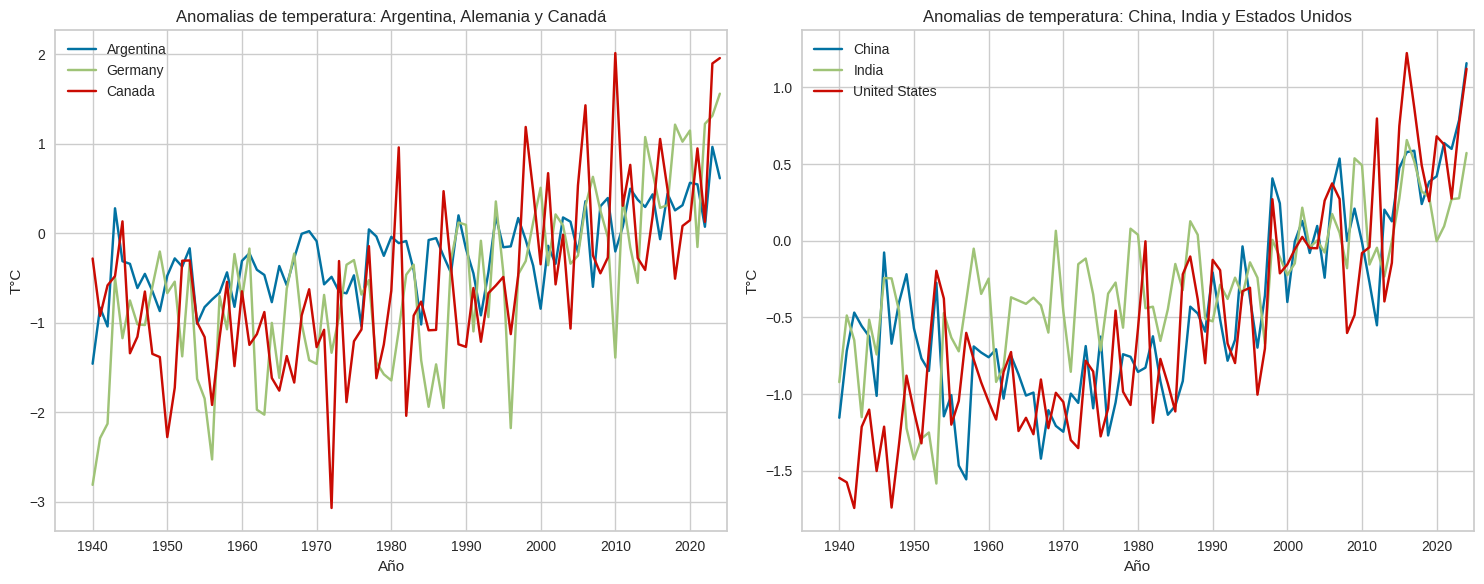

In [397]:
## Grafico de Lineas para ver anomalias de Temperatura a lo largo de los años ##

# Selección de países para trabajar con los gráficos:
paises_seleccionados = ['Argentina', 'China', 'India', 'United States', 'Germany', 'Canada']
df_seleccionado = union_df_filtrado[union_df_filtrado['Entity'].isin(paises_seleccionados)]

# Crear subplots:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico para Argentina, Alemania y Canadá
for pais in ['Argentina', 'Germany', 'Canada']:
    subset = df_seleccionado[df_seleccionado['Entity'] == pais]
    axs[0].plot(subset['Year'], subset['T(°C)'], label=pais)

axs[0].set_title('Anomalias de temperatura: Argentina, Alemania y Canadá')
axs[0].set_xlabel('Año')
axs[0].set_xlim(1935, 2025)
axs[0].set_ylabel('T°C')
axs[0].legend()

# Gráfico para China, India y Estados Unidos
for pais in ['China', 'India', 'United States']:
    subset = df_seleccionado[df_seleccionado['Entity'] == pais]
    axs[1].plot(subset['Year'], subset['T(°C)'], label=pais)

axs[1].set_title('Anomalias de temperatura: China, India y Estados Unidos')
axs[1].set_xlabel('Año')
axs[1].set_xlim(1935, 2025)
axs[1].set_ylabel('T°C')
axs[1].legend()

# Ajustar los espacios entre los gráficos
plt.tight_layout()
plt.show()

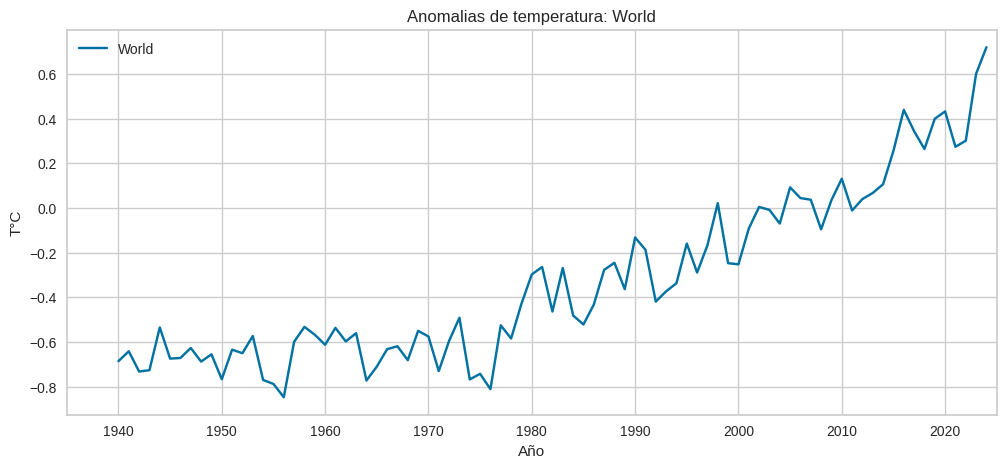

In [398]:
# Selección de países para trabajar con los gráficos:
paises_seleccionados = ['World']
df_seleccionado = union_df_filtrado[union_df_filtrado['Entity'].isin(paises_seleccionados)]

# Selección de países para trabajar con los gráficos:
paises_seleccionados = ['World']
df_seleccionado = union_df_filtrado[union_df_filtrado['Entity'].isin(paises_seleccionados)]

#Tamaño de grafico:
plt.figure(figsize=(12, 5))

# Gráfico para el Mundo:
import matplotlib.pyplot as plt
for pais in ['World']:
    subset = df_seleccionado[df_seleccionado['Entity'] == pais]
    plt.plot(subset['Year'], subset['T(°C)'], label=pais)

plt.title('Anomalias de temperatura: World')
plt.xlabel('Año')
plt.xlim(1935, 2025)
plt.ylabel('T°C')
plt.legend()
plt.show()


In [399]:
#########
# Esto me resta mostrando la desviación de la temperatura de superficie promedio de un año específico.
########

In [400]:
union_df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26443 entries, 0 to 26442
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     26443 non-null  object 
 1   Year                       26443 non-null  int64  
 2   Greenhouse_Gas(tn)         18555 non-null  float64
 3   T(°C)                      17079 non-null  float64
 4   wind(TWh)                  8706 non-null   float64
 5   hydro(TWh)                 9532 non-null   float64
 6   solar(TWh)                 8674 non-null   float64
 7   other(bioenergy)(TWh)      8898 non-null   float64
 8   Deforestation(Ha)          539 non-null    float64
 9   Population                 19439 non-null  float64
 10  emision_co2(Tn)            17795 non-null  float64
 11  emision_n2o(Tn)            16775 non-null  float64
 12  emision__ch4(Tn)           16405 non-null  float64
 13  emision__so2(Tn)           17274 non-null  flo

<Figure size 1500x1000 with 0 Axes>

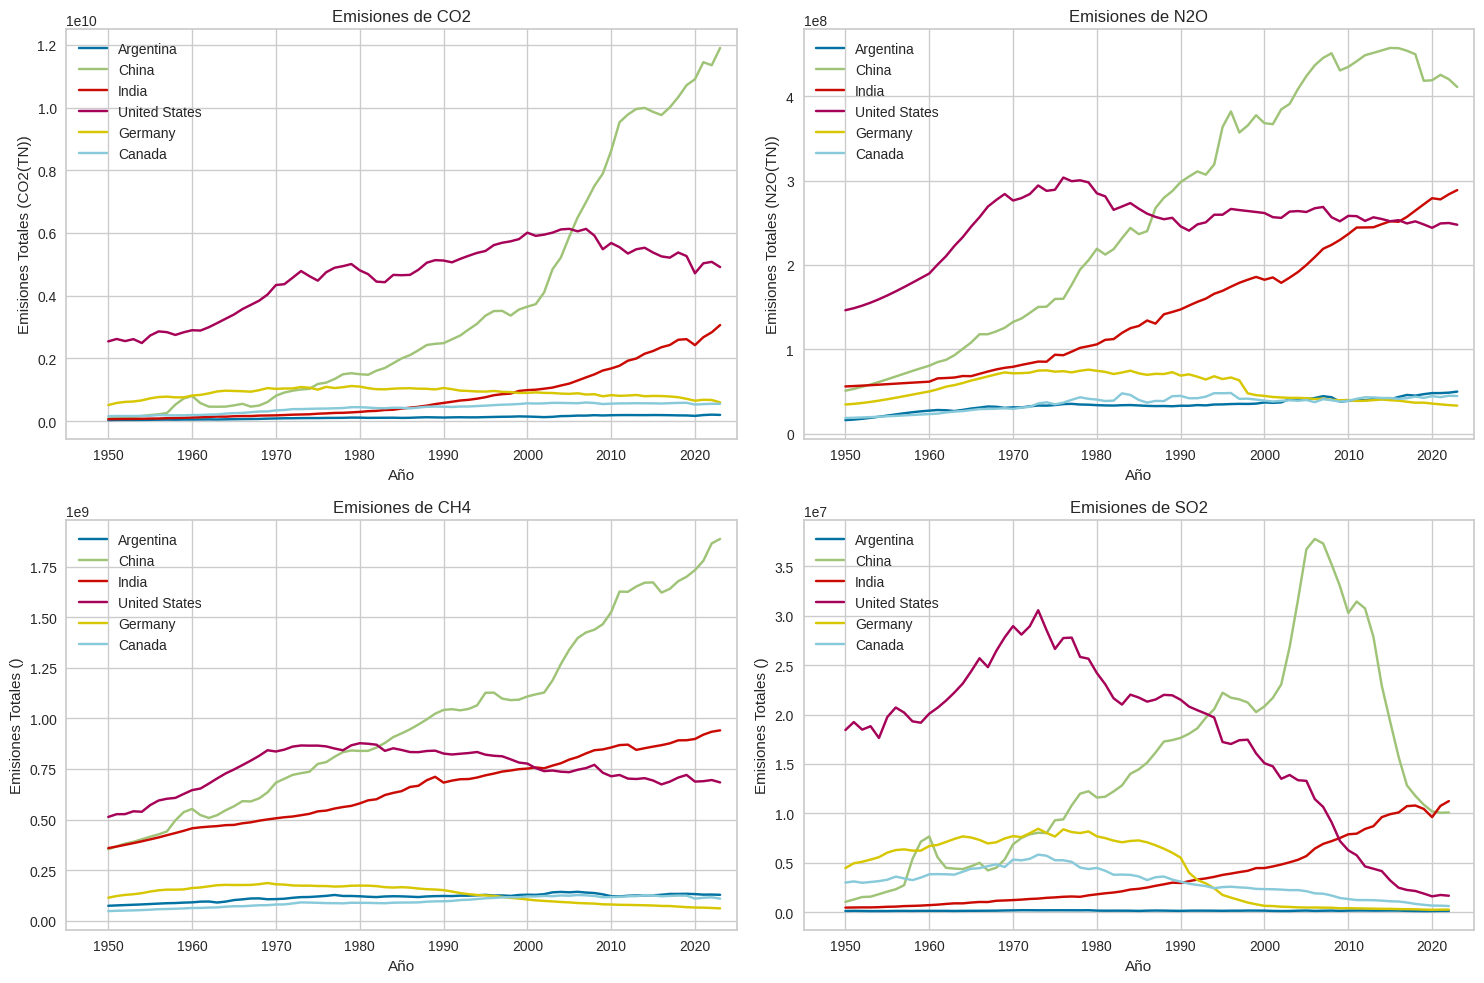

In [401]:
# GRAFICOS DE LINEAS PARA VER LA TENDENCIA DE LAS EMISIONES A LO LARGO DE LOS AÑOS

# Selección de países para trabajar con los gráficos:
paises_seleccionados = ['Argentina', 'China', 'India', 'United States', 'Germany', 'Canada']
df_seleccionado = union_df_filtrado[union_df_filtrado['Entity'].isin(paises_seleccionados)]

# Tamaño de gráfico:
plt.figure(figsize=(15, 10))

# Subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Variables para graficar:
variables = ['emision_co2(Tn)', 'emision_n2o(Tn)', 'emision__ch4(Tn)', 'emision__so2(Tn)']
titulos = ['Emisiones de CO2', 'Emisiones de N2O', 'Emisiones de CH4', 'Emisiones de SO2']

# Graficar cada variable en su subplot correspondiente
for i, var in enumerate(variables):
    ax = axs[i//2, i%2]
    for pais in paises_seleccionados:
        subset = df_seleccionado[df_seleccionado['Entity'] == pais]
        ax.plot(subset['Year'], subset[var], label=pais)
    ax.set_title(titulos[i])
    ax.set_xlabel('Año')
    ax.set_xlim(1945, 2025)
    ax.set_ylabel(f'Emisiones Totales ({var.split("_")[1].upper()})')
    ax.legend()

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()

In [402]:
# Emisiones de CO2 (Gráfico superior izquierdo):
   #China presenta un incremento significativo en las emisiones de CO2 a partir del año 2000, superando a los demás países.
   #Estados Unidos muestra un incremento constante hasta alrededor del año 2005, después del cual las emisiones se estabilizan y empiezan a disminuir ligeramente.
   #India tiene un aumento gradual a lo largo del tiempo.
   #Alemania, Canadá y Argentina presentan emisiones relativamente más bajas y estables en comparación con China y Estados Unidos.

# Emisiones de N2O (Gráfico superior derecho):
  #Estados Unidos presenta las emisiones más altas desde el año 1950 a ~1995. Alcanzando su punto máximo alrededor de 1975, y luego disminuyendo.
  #China muestra un aumento constante, superando a Estados Unidos alrededor del año 1995.
  #India también muestra un incremento gradual.
  #Alemania, Canadá y Argentina mantienen emisiones relativamente más bajas y estables.

# Emisiones de CH4 (Gráfico inferior izquierdo):
  #China presenta un incremento significativo en las emisiones de CH4 a partir del año 2000. No disminuyen en los ultimos años.
  #Estados Unidos muestra un aumento constante, después del cual las emisiones se estabilizan y bajan gradualmente.
  #India presenta un aumento gradual. Supera a eeuu en los años 2000.

# Emisiones de SO2 (Gráfico inferior derecho):
  #Estados Unidos presenta las emisiones más altas, alcanzando su punto máximo alrededor de 1970 y luego disminuyendo significativamente.
  #China muestra un incremento significativo hasta alrededor de 2005, después del cual las emisiones disminuyen muy significativamente.
  #India muestra un aumento gradual. Supera a eeuu en los años 2010 y a china luego del 2020.

<Figure size 1000x600 with 0 Axes>

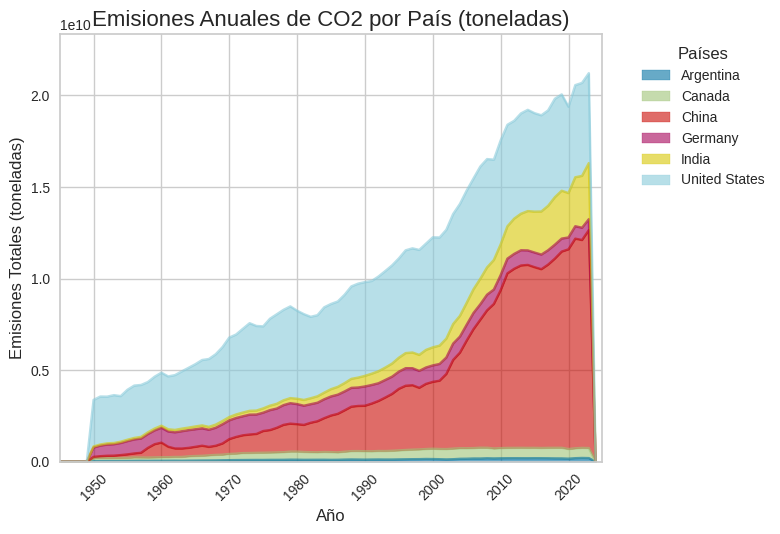

In [403]:
### Grafico de areas apiladas de emisiones de CO2 para ciertos paises

# Agrupamos los datos por año y país, sumando las emisiones totales
df_agrupado = df_seleccionado.groupby(['Year', 'Entity'])['emision_co2(Tn)'].sum().reset_index()

# Pivotamos la tabla para preparar los datos para un gráfico apilado
df_pivot = df_agrupado.pivot(index='Year', columns='Entity', values='emision_co2(Tn)').fillna(0)

# Crear gráfico de área apilada
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='area', stacked=True, alpha=0.6)

# Para configuramos el título y etiquetas
plt.title('Emisiones Anuales de CO2 por País (toneladas)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Emisiones Totales (toneladas)', fontsize=12)

# Ajustes del eje x (para mostrar los años cada 10)
#plt.xticks(np.arange(df_pivot.index.min(), df_pivot.index.max() + 1, 20), rotation=45)
plt.xticks(rotation=45)
plt.xlim(1945,2025)

# Ajustar los límites del eje y
plt.ylim(0, df_pivot.sum(axis=1).max() * 1.1)

# leyenda
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')

# gráfico
plt.tight_layout()
plt.show()

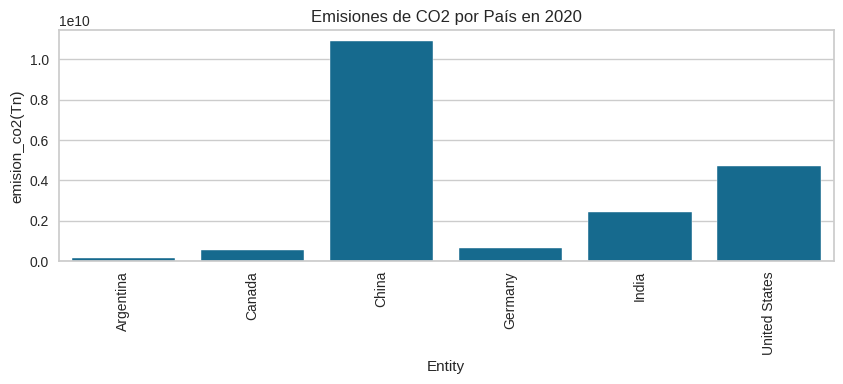

In [404]:
# Gráfico de Barras: emisiones de CO2 para un año especifico.

import seaborn as sns

# Gráfico de barras para un año específico:
year_filter = 2020
subset = df_seleccionado[df_seleccionado['Year'] == year_filter]

plt.figure(figsize=(10, 3))
sns.barplot(data=subset, x='Entity', y='emision_co2(Tn)')
plt.title(f'Emisiones de CO2 por País en {year_filter}')
plt.xticks(rotation=90)
plt.show()

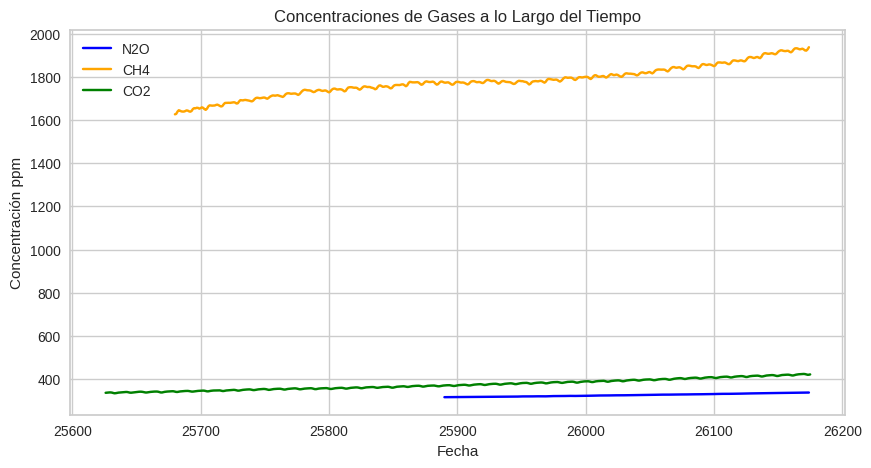

In [405]:
# Graficar las concentraciones de gases en la atmosfera a lo largo del tiempo

# Establecer el índice como la columna 'Day'
#union_df_filtrado.set_index('Year', inplace=True)  #Estaa linea correrla solo una vez, es para que aparezcan las años en X. Cuando lo corres dos veces borra la columna años, nose el motivo.

plt.figure(figsize=(10, 5))
plt.plot(union_df_filtrado['concentration_n2o(ppm)'], label='N2O', color='blue')
plt.plot(union_df_filtrado['concentration_ch4(ppm)'], label='CH4', color='orange')
plt.plot(union_df_filtrado['concentration_co2(ppm)'], label='CO2', color='green')
plt.title('Concentraciones de Gases a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Concentración ppm')
plt.legend()
plt.show()

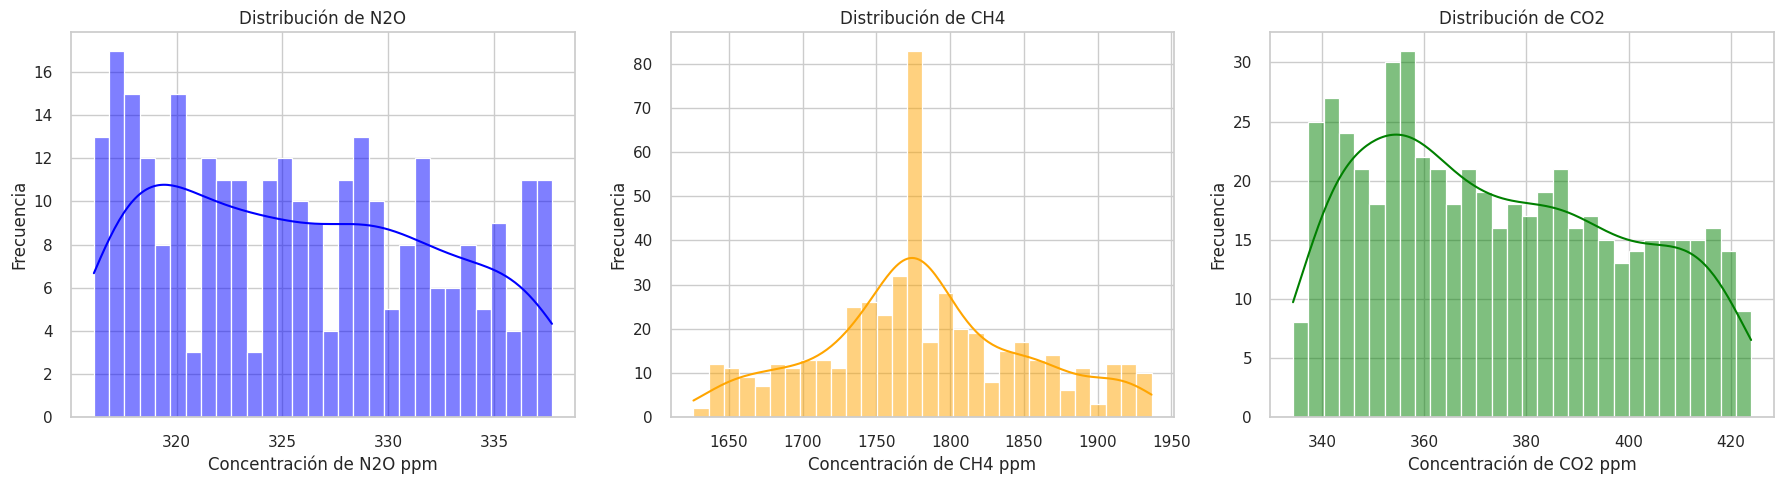

In [406]:
### Distribuciones de las concentraciones de gases en la atmosfera ###

# Establecer el estilo de seaborn:
sns.set(style='whitegrid')

# Crear subplots (esto es para que aprezcan los tres graficos juntos)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Histograma para N2O
sns.histplot(union_df_filtrado['concentration_n2o(ppm)'], bins=30, color='blue', kde=True, ax=axes[0])
axes[0].set_title('Distribución de N2O')
axes[0].set_xlabel('Concentración de N2O ppm')
axes[0].set_ylabel('Frecuencia')

# Histograma para CH4
sns.histplot(union_df_filtrado['concentration_ch4(ppm)'], bins=30, color='orange', kde=True, ax=axes[1])
axes[1].set_title('Distribución de CH4')
axes[1].set_xlabel('Concentración de CH4 ppm')
axes[1].set_ylabel('Frecuencia')

# Histograma para CO2
sns.histplot(union_df_filtrado['concentration_co2(ppm)'], bins=30, color='green', kde=True, ax=axes[2])
axes[2].set_title('Distribución de CO2')
axes[2].set_xlabel('Concentración de CO2 ppm')
axes[2].set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Uso de Energias renovables**

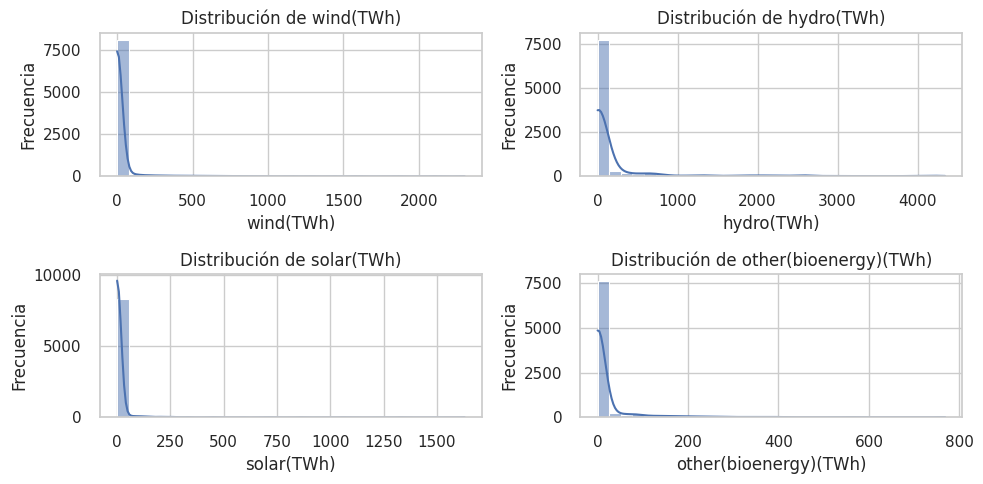

In [407]:
# Distribución del uso de Energias renovables

plt.figure(figsize=(10, 5))

for i, column in enumerate(['wind(TWh)', 'hydro(TWh)', 'solar(TWh)', 'other(bioenergy)(TWh)']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(union_df_filtrado[column].dropna(), bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

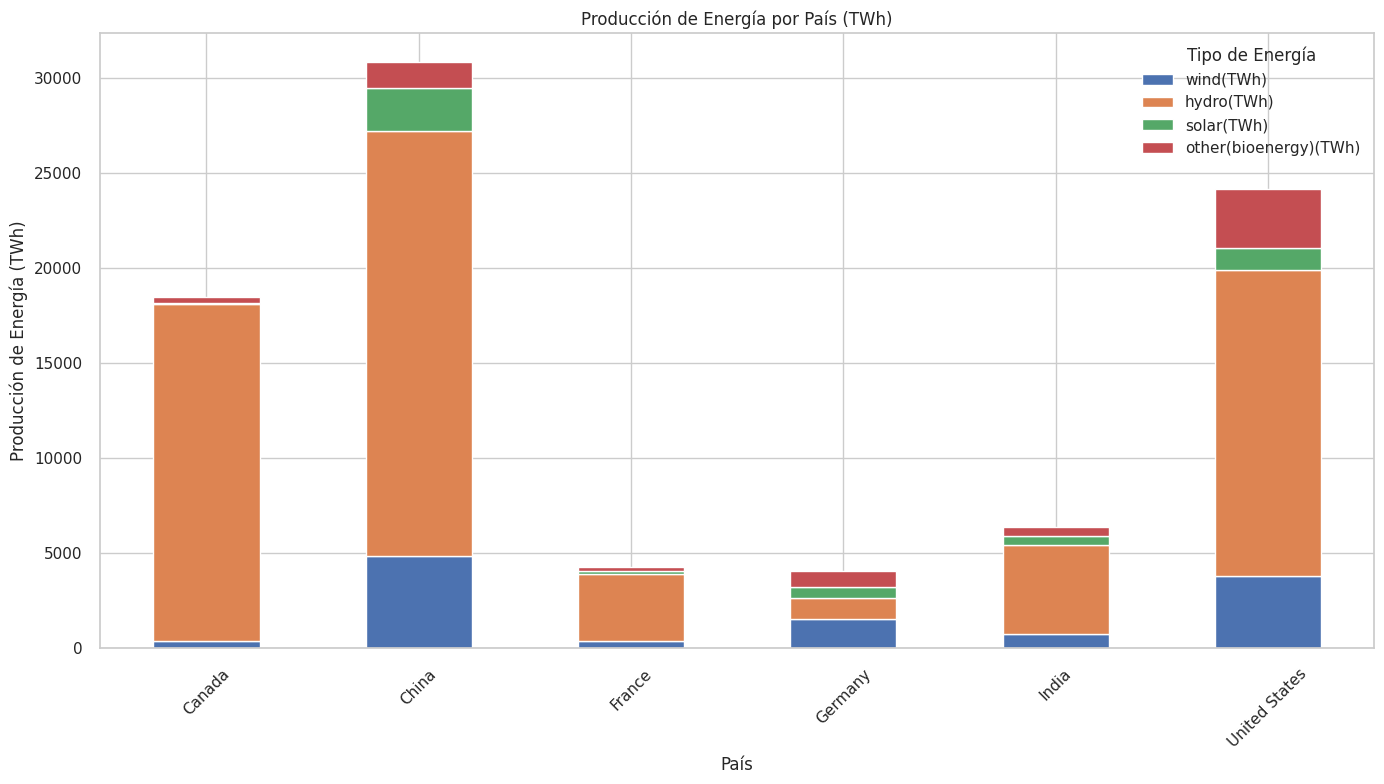

In [408]:
# Grafico de Barras para ver diferentes tipos de energía utilizada por paises selecionados

# Selección de países para trabajar con los gráficos:
paises_seleccionados = ['France', 'China', 'India', 'United States', 'Germany', 'Canada']
df_seleccionado = union_df_filtrado[union_df_filtrado['Entity'].isin(paises_seleccionados)]

# Agrupar por país y sumar las producciones de energía
energia_por_pais = df_seleccionado.groupby('Entity')[['wind(TWh)', 'hydro(TWh)', 'solar(TWh)', 'other(bioenergy)(TWh)']].sum().reset_index()

# Graficar
energia_por_pais.set_index('Entity').plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Producción de Energía por País (TWh)')
plt.ylabel('Producción de Energía (TWh)')
plt.xlabel('País')
plt.legend(title='Tipo de Energía')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

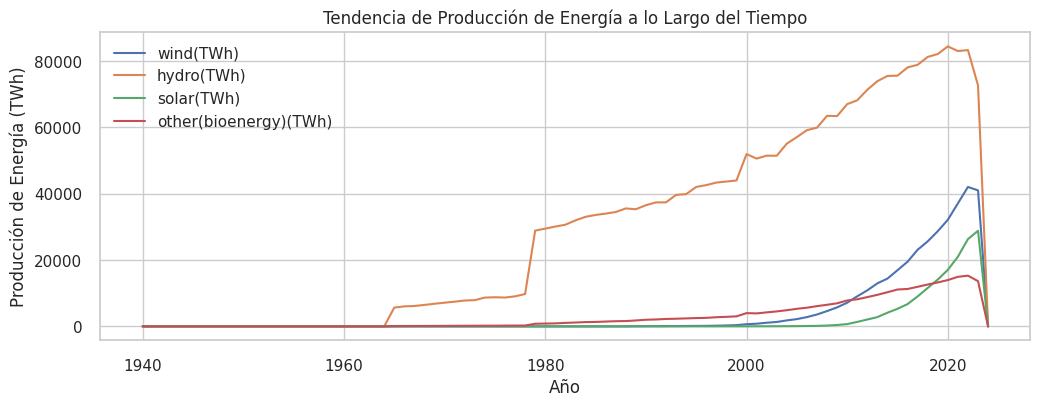

In [409]:
# Grráfico de líneas para analizar las tendencias a lo largo del tiempo de cada energia

plt.figure(figsize=(12, 4))

for column in ['wind(TWh)', 'hydro(TWh)', 'solar(TWh)', 'other(bioenergy)(TWh)']:
    sns.lineplot(data=union_df_filtrado.groupby('Year')[column].sum().reset_index(), x='Year', y=column, label=column)

plt.title('Tendencia de Producción de Energía a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Producción de Energía (TWh)')
plt.legend()
plt.show()

**Personas en el mundo sin acceso a la electricidad**

In [410]:
# Resumen estadístico de la variable
print(union_df_filtrado['Personas_sin_electricidad'].describe())

# Verificar valores nulos
print(union_df_filtrado['Personas_sin_electricidad'].isnull().sum())

count    6.824000e+03
mean     8.984302e+07
std      2.707568e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.083182e+05
75%      9.188940e+06
max      1.627944e+09
Name: Personas_sin_electricidad, dtype: float64
19619


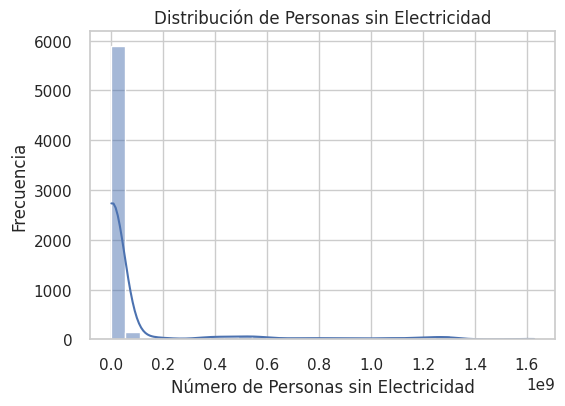

In [411]:
# distribución
plt.figure(figsize=(6, 4))
sns.histplot(union_df_filtrado['Personas_sin_electricidad'].dropna(), bins=30, kde=True)
plt.title('Distribución de Personas sin Electricidad')
plt.xlabel('Número de Personas sin Electricidad')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-412-fb28d5f938b9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=personas_por_pais, x='Personas_sin_electricidad', y='Entity', palette='viridis')


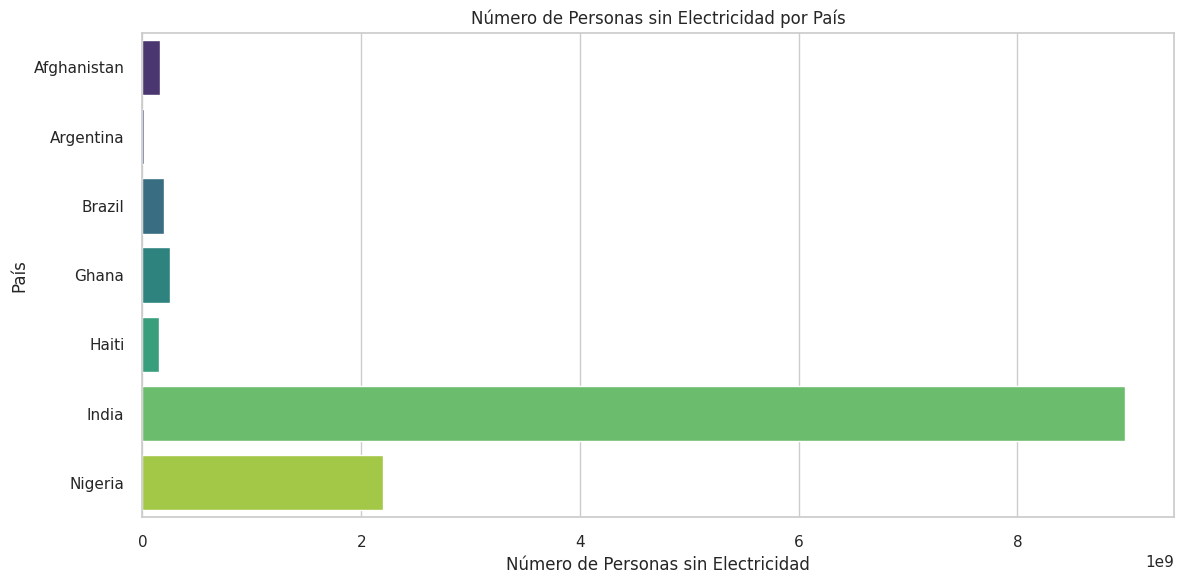

In [412]:
# Comparación de paises con grafico de barra

# Selección de países para trabajar con los gráficos:
paises_seleccionados = ['Haiti', 'Argentina', 'India', 'Brazil', 'Afghanistan', 'Ghana', 'Nigeria']
df_seleccionado = union_df_filtrado[union_df_filtrado['Entity'].isin(paises_seleccionados)]

# Agrupar por país y sumar las personas sin electricidad
personas_por_pais = df_seleccionado.groupby('Entity')['Personas_sin_electricidad'].sum().reset_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=personas_por_pais, x='Personas_sin_electricidad', y='Entity', palette='viridis')
plt.title('Número de Personas sin Electricidad por País')
plt.xlabel('Número de Personas sin Electricidad')
plt.ylabel('País')
plt.tight_layout()
plt.show()

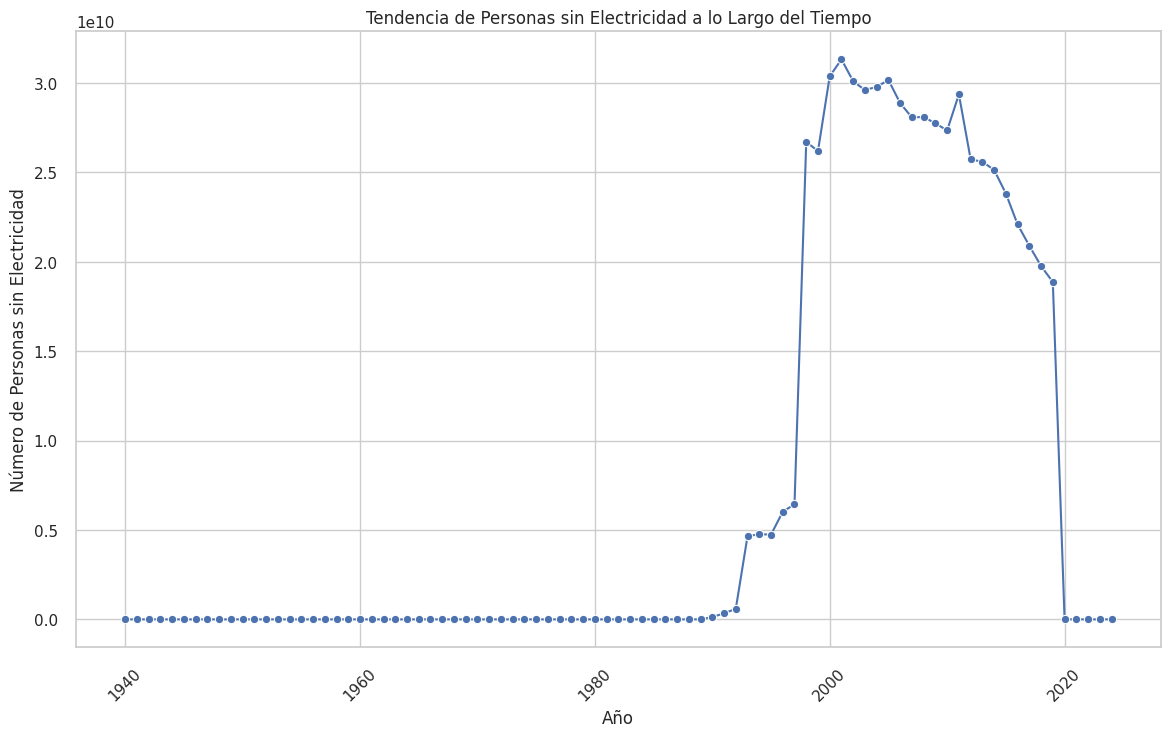

In [413]:
# Análisis de Tendencias a lo Largo del Tiempo
   #Muestra cómo ha cambiado el número de personas sin electricidad con el tiempo.

# Agrupar datos por año y sumar las personas sin electricidad
tendencia_personas = union_df_filtrado.groupby('Year')['Personas_sin_electricidad'].sum().reset_index()

# Graficar
plt.figure(figsize=(14, 8))
sns.lineplot(data=tendencia_personas, x='Year', y='Personas_sin_electricidad', marker='o')
plt.title('Tendencia de Personas sin Electricidad a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Personas sin Electricidad')
plt.xticks(rotation=45)
plt.show()

<ipython-input-414-fb0e3ea737b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_paises_sin_electricidad, x='Personas_sin_electricidad', y='Entity', palette='rocket')


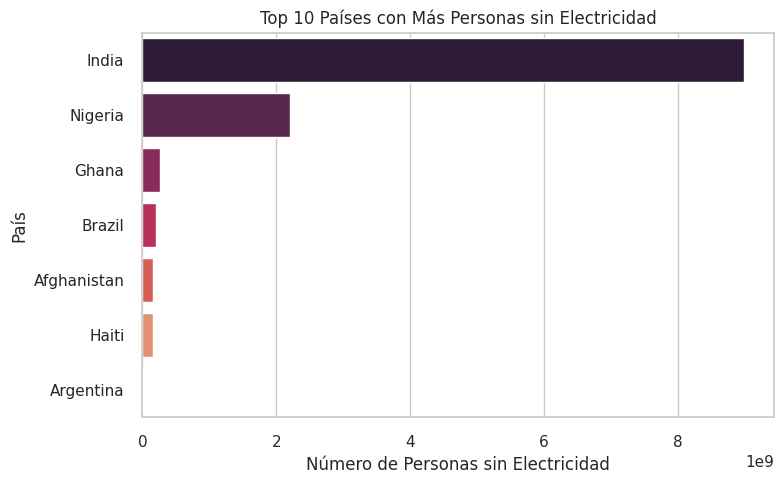

In [414]:
# Ordenar los países por el número de personas sin electricidad
top_paises_sin_electricidad = personas_por_pais.sort_values(by='Personas_sin_electricidad', ascending=False).head(10)

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(data=top_paises_sin_electricidad, x='Personas_sin_electricidad', y='Entity', palette='rocket')
plt.title('Top 10 Países con Más Personas sin Electricidad')
plt.xlabel('Número de Personas sin Electricidad')
plt.ylabel('País')
plt.tight_layout()
plt.show()

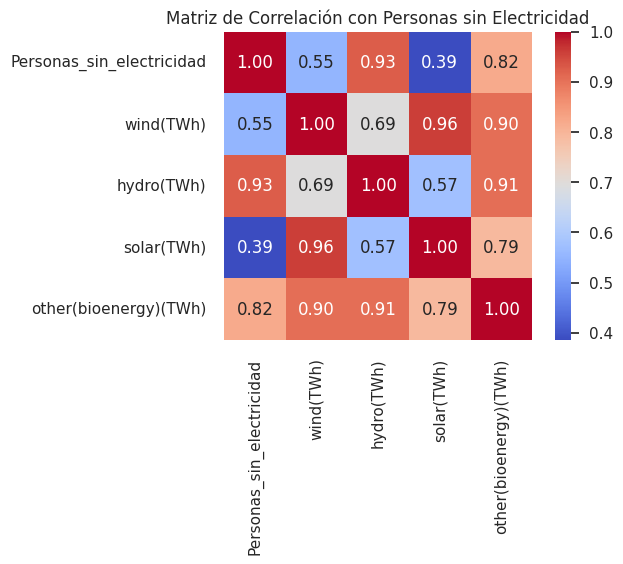

In [415]:
# Correlacion de personas sin electricidad con el uso de energias renovables (solo para ver que da) (Luego se puede sumar mas varibles).
plt.figure(figsize=(6, 4))
correlacion = union_df_filtrado[['Personas_sin_electricidad', 'wind(TWh)', 'hydro(TWh)', 'solar(TWh)', 'other(bioenergy)(TWh)']].corr()
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación con Personas sin Electricidad')
plt.show()

**Uso de energias NO renovables: petroleo, gas y carbon**

In [416]:
union_df_filtrado.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26443 entries, 0 to 26442
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     26443 non-null  object 
 1   Year                       26443 non-null  int64  
 2   Greenhouse_Gas(tn)         18555 non-null  float64
 3   T(°C)                      17079 non-null  float64
 4   wind(TWh)                  8706 non-null   float64
 5   hydro(TWh)                 9532 non-null   float64
 6   solar(TWh)                 8674 non-null   float64
 7   other(bioenergy)(TWh)      8898 non-null   float64
 8   Deforestation(Ha)          539 non-null    float64
 9   Population                 19439 non-null  float64
 10  emision_co2(Tn)            17795 non-null  float64
 11  emision_n2o(Tn)            16775 non-null  float64
 12  emision__ch4(Tn)           16405 non-null  float64
 13  emision__so2(Tn)           17274 non-null  flo

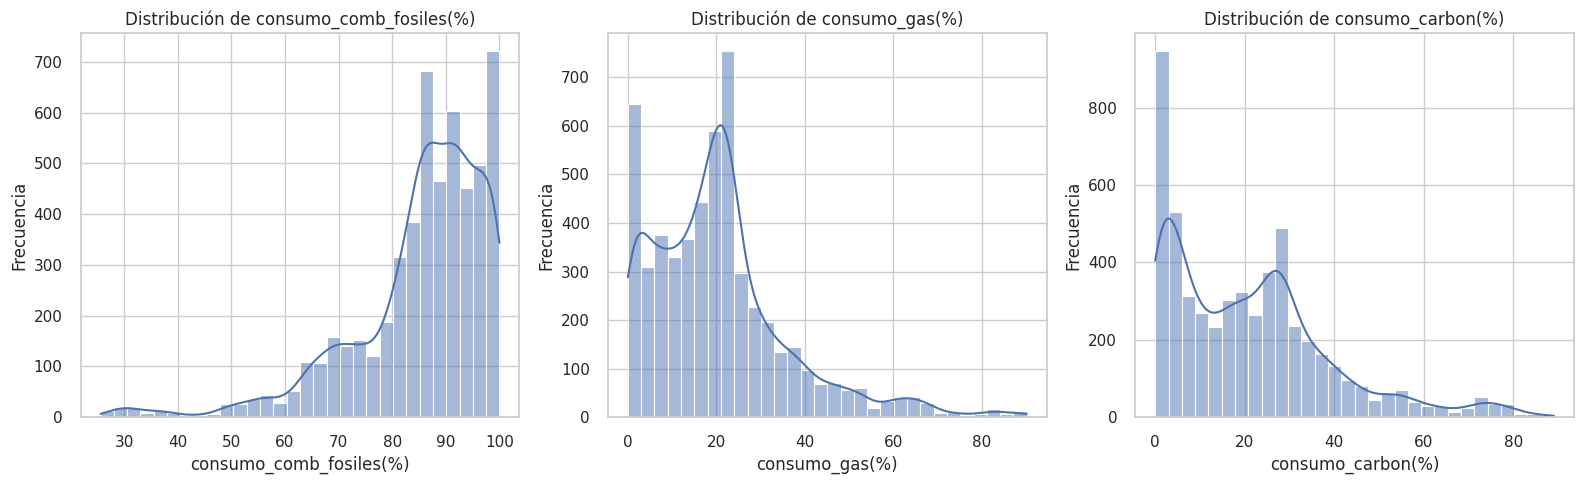

In [417]:
# Distribuciones de las variableas de consumo de comb. fosiles, gas y carbon

plt.figure(figsize=(16, 5))

for i, column in enumerate(['consumo_comb_fosiles(%)', 'consumo_gas(%)', 'consumo_carbon(%)']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(union_df_filtrado[column].dropna(), bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

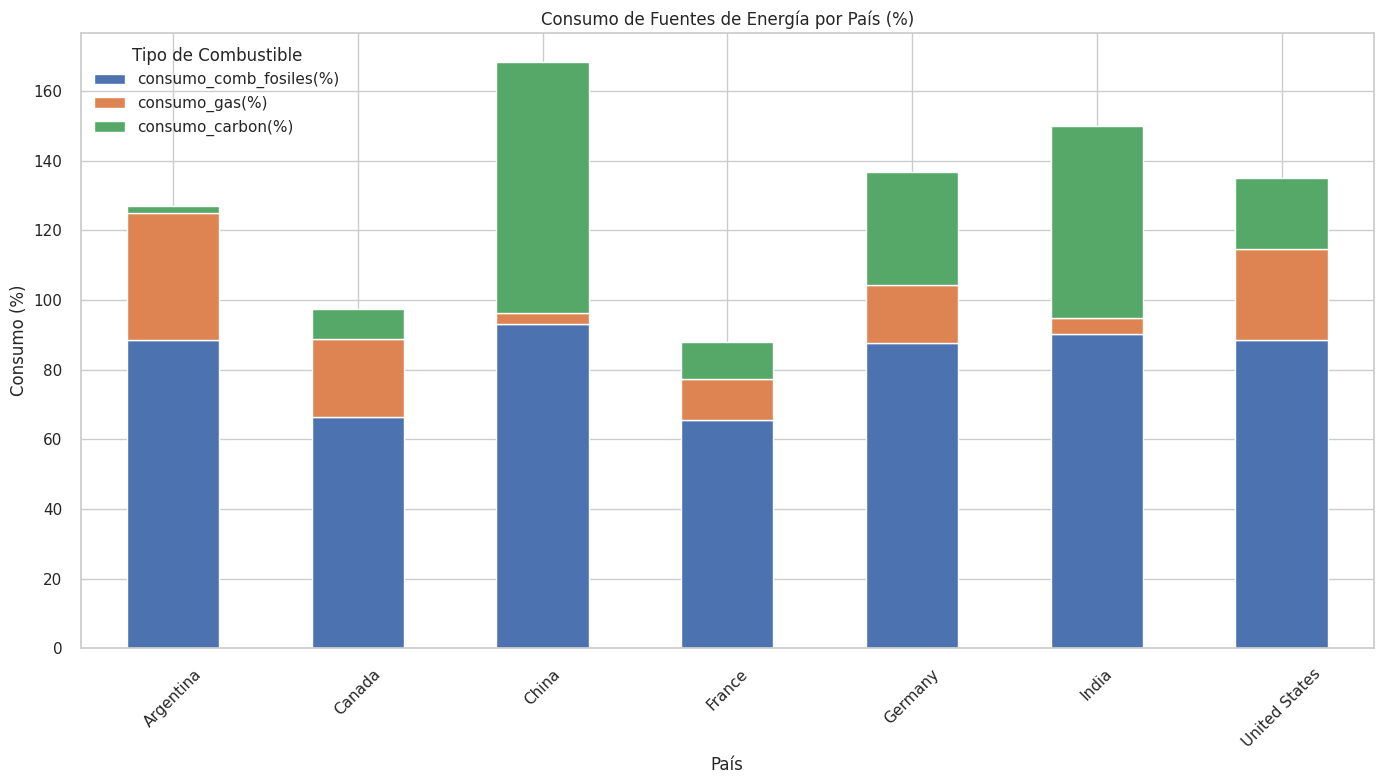

In [418]:
# Comparación de Consumos por País de energias NO renovables
   #gráfico de barras apiladas que muestrab el consumo de combustibles fósiles, gas y carbón por país.

# Selección de países para trabajar con los gráficos:
paises_seleccionados = ['Argentina', 'China', 'India', 'United States', 'Germany', 'Canada','France']
df_seleccionado = union_df_filtrado[union_df_filtrado['Entity'].isin(paises_seleccionados)]

# Agrupar por país y calcular la media de consumo
consumo_por_pais = df_seleccionado[['Entity', 'consumo_comb_fosiles(%)', 'consumo_gas(%)', 'consumo_carbon(%)']].groupby('Entity').mean().reset_index()

# Graficar
consumo_por_pais.set_index('Entity').plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Consumo de Fuentes de Energía por País (%)')
plt.xlabel('País')
plt.ylabel('Consumo (%)')
plt.legend(title='Tipo de Combustible')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

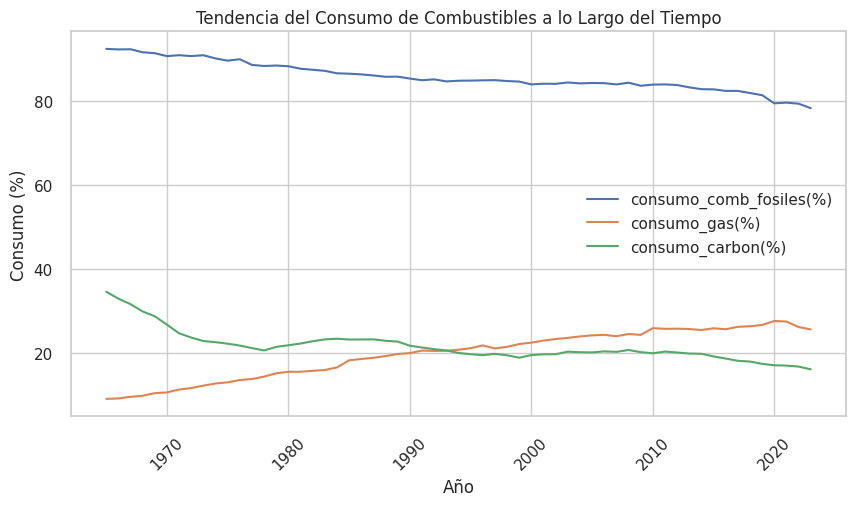

In [419]:
# Análisis de Tendencias a lo Largo del Tiempo
  #Muestra cómo han cambiado estos consumos a lo largo de los años.

# Crear gráficos de líneas para analizar las tendencias a lo largo del tiempo
plt.figure(figsize=(10, 5))

for column in ['consumo_comb_fosiles(%)', 'consumo_gas(%)', 'consumo_carbon(%)']:
    sns.lineplot(data=union_df_filtrado.groupby('Year')[column].mean().reset_index(), x='Year', y=column, label=column)

plt.title('Tendencia del Consumo de Combustibles a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Consumo (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<ipython-input-420-e95134dae1c6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_combustibles_fosiles, x='consumo_comb_fosiles(%)', y='Entity', palette='rocket')


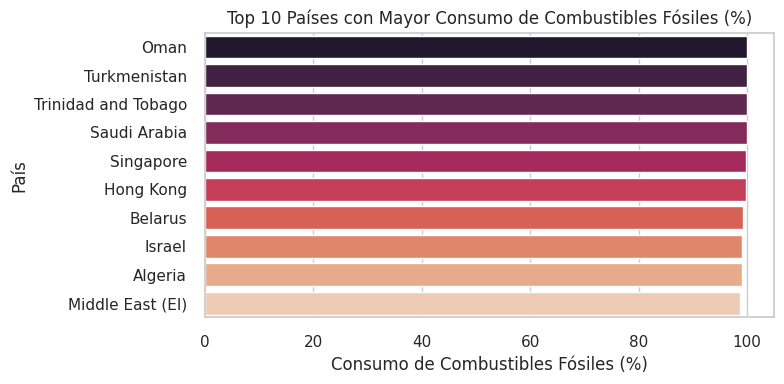

<ipython-input-420-e95134dae1c6>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_combustibles_gas, x='consumo_gas(%)', y='Entity', palette='rocket')


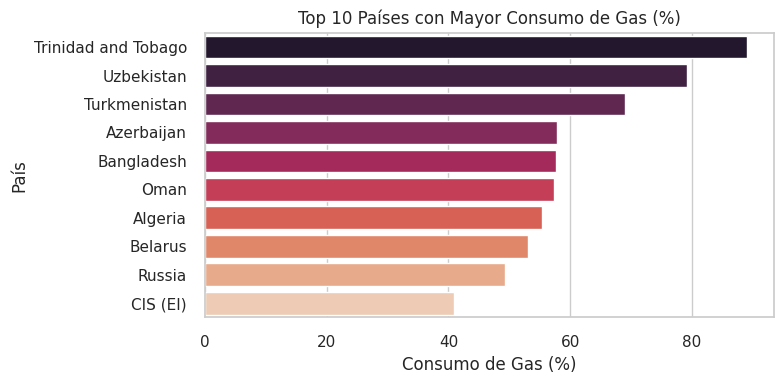

<ipython-input-420-e95134dae1c6>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_combustibles_carbon, x='consumo_carbon(%)', y='Entity', palette='rocket')


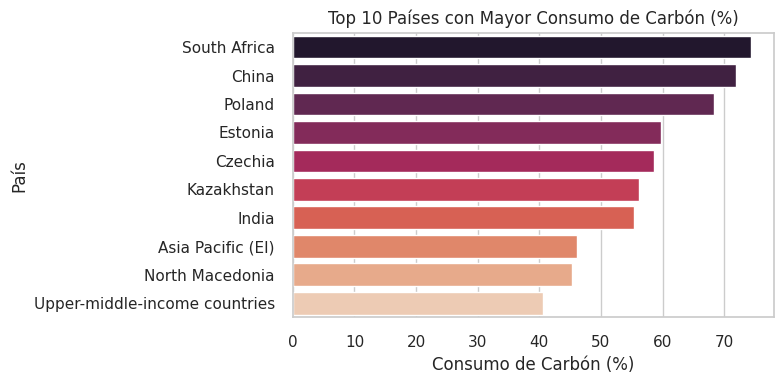

In [420]:
# Identificar los paises con mas consumo de comb.fosiles, carbon y gas.

# Agrupar por país y calcular la media de consumo
consumo_por_pais = union_df_filtrado[['Entity', 'consumo_comb_fosiles(%)', 'consumo_gas(%)', 'consumo_carbon(%)']].groupby('Entity').mean().reset_index()

# Obtener los 10 países con mayor consumo de combustibles fósiles
top_combustibles_fosiles = consumo_por_pais.sort_values(by='consumo_comb_fosiles(%)', ascending=False).head(10)
top_combustibles_gas = consumo_por_pais.sort_values(by='consumo_gas(%)', ascending=False).head(10)
top_combustibles_carbon = consumo_por_pais.sort_values(by='consumo_carbon(%)', ascending=False).head(10)

# estilo del grafico
sns.set(style='whitegrid')

# Gráfico 1: Consumo de Combustibles Fósiles
plt.figure(figsize=(8, 4))
sns.barplot(data=top_combustibles_fosiles, x='consumo_comb_fosiles(%)', y='Entity', palette='rocket')
plt.title('Top 10 Países con Mayor Consumo de Combustibles Fósiles (%)')
plt.xlabel('Consumo de Combustibles Fósiles (%)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# Gráfico 2: Consumo de Gas
plt.figure(figsize=(8, 4))
sns.barplot(data=top_combustibles_gas, x='consumo_gas(%)', y='Entity', palette='rocket')
plt.title('Top 10 Países con Mayor Consumo de Gas (%)')
plt.xlabel('Consumo de Gas (%)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# Gráfico 3: Consumo de Carbón
plt.figure(figsize=(8, 4))
sns.barplot(data=top_combustibles_carbon, x='consumo_carbon(%)', y='Entity', palette='rocket')
plt.title('Top 10 Países con Mayor Consumo de Carbón (%)')
plt.xlabel('Consumo de Carbón (%)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

**GREENHOUSE**

In [421]:
# Resumen estadístico de la variable Greenhouse_Gas(tn)
print(union_df_filtrado['Greenhouse_Gas(tn)'].describe())

# Verificar valores nulos
print(union_df_filtrado['Greenhouse_Gas(tn)'].isnull().sum())

count    1.855500e+04
mean     1.923364e+09
std      7.651602e+09
min     -1.496139e+07
25%      7.798574e+06
50%      4.074360e+07
75%      1.816499e+08
max      5.381685e+10
Name: Greenhouse_Gas(tn), dtype: float64
7888


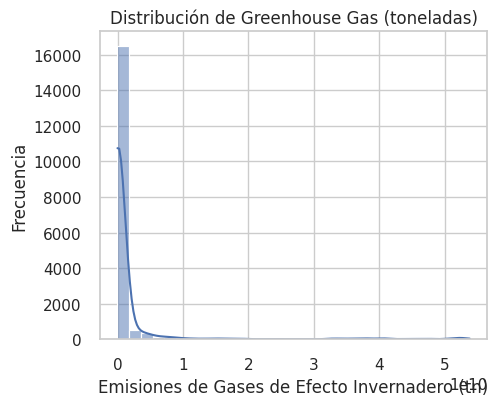

In [422]:
# Gráfico de distribución
plt.figure(figsize=(5, 4))
sns.histplot(union_df_filtrado['Greenhouse_Gas(tn)'].dropna(), bins=30, kde=True)
plt.title('Distribución de Greenhouse Gas (toneladas)')
plt.xlabel('Emisiones de Gases de Efecto Invernadero (tn)')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-423-e2ab7fc10498>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emisiones_por_pais.sort_values(by='Greenhouse_Gas(tn)', ascending=False).head(10),


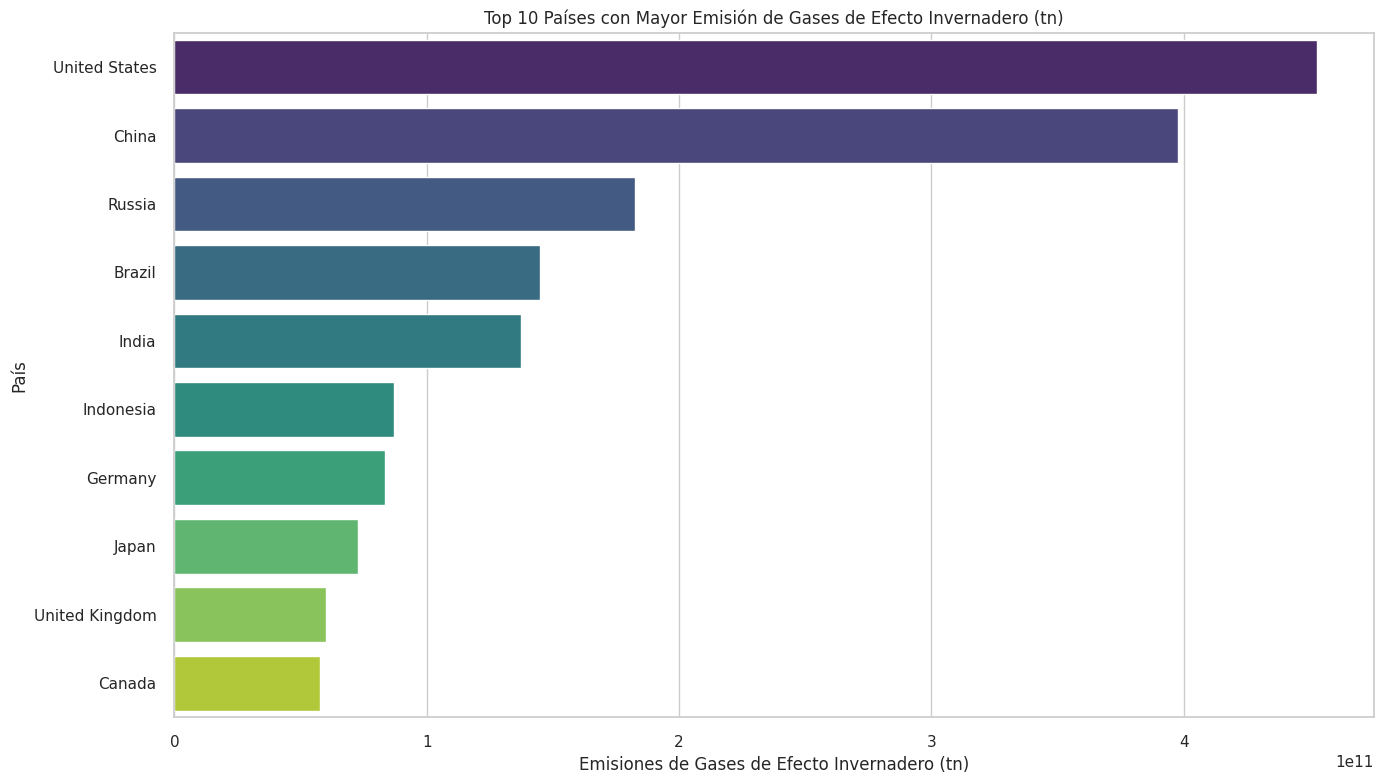

In [423]:
# Comparación por País de greenhouse
 #Visualizamos las emisiones de gases de efecto invernadero por país.
 #Esto puede ayudar a identificar los países que generan más emisiones.


# Definir entidades a excluir  (aca deberiamos limpiar quizas la variable para que solo aparescan paises y no regiones). O bien que solo aparezcan regiones y no paises.
excluir_entidades = [
    'World', 'High-income countries','OECD (Jones et al.)','Upper-middle-income countries',
    'Asia','Europe','North America','South America', 'Africa', 'North America (excl. USA)','European Union (28)', 'Asia (excl. China and India)',
    'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'European Union (27)','Least developed countries (Jones et al.)',
    'Lower-middle-income countries', 'Low-income countries']

# Filtrar el dataframe, excluyendo las entidades no deseadas
union_df_filtrado_clean = union_df_filtrado[~union_df_filtrado['Entity'].isin(excluir_entidades)]

# Agrupar por país y sumar las emisiones de gases de efecto invernadero
emisiones_por_pais = union_df_filtrado_clean.groupby('Entity')['Greenhouse_Gas(tn)'].sum().reset_index()

# Graficar
plt.figure(figsize=(14, 8))
sns.barplot(data=emisiones_por_pais.sort_values(by='Greenhouse_Gas(tn)', ascending=False).head(10),
            x='Greenhouse_Gas(tn)', y='Entity', palette='viridis')
plt.title('Top 10 Países con Mayor Emisión de Gases de Efecto Invernadero (tn)')
plt.xlabel('Emisiones de Gases de Efecto Invernadero (tn)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

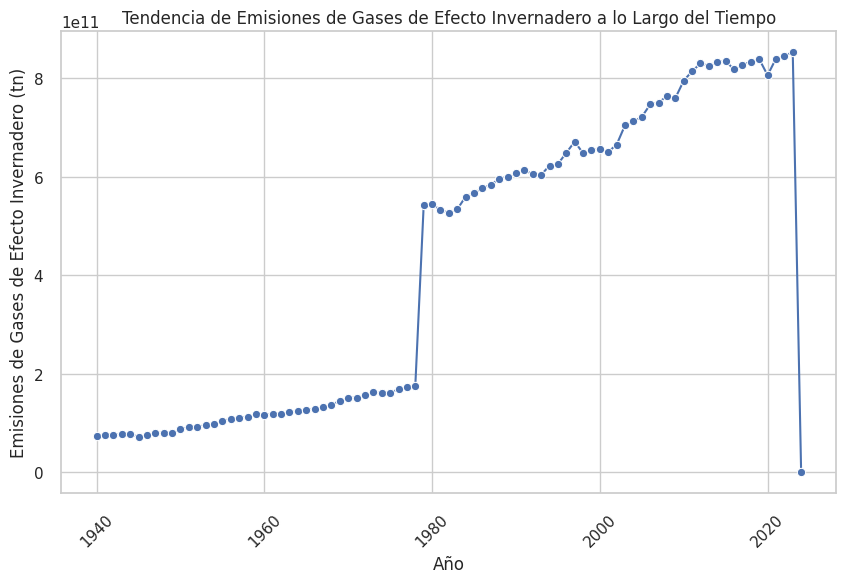

In [424]:
# Análisis de Tendencias a lo Largo del Tiempo

# Agrupar por año y sumar las emisiones
tendencia_emisiones = union_df_filtrado.groupby('Year')['Greenhouse_Gas(tn)'].sum().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(data=tendencia_emisiones, x='Year', y='Greenhouse_Gas(tn)', marker='o')
plt.title('Tendencia de Emisiones de Gases de Efecto Invernadero a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Emisiones de Gases de Efecto Invernadero (tn)')
plt.xticks(rotation=45)
plt.show()



---



---



---



---



# ANALISIS DE UNION_DF COMO DF Y CREACION DE MODELOS

In [425]:
# Urls del drive crudas de union_df

#union_df.csv:
# https://drive.google.com/file/d/1PXh7AlHYfean6cbhKlBVbr4A3RVckguI/view?usp=drive_link

#union_df_filtrado.csv:
# https://drive.google.com/file/d/1YqHvs670fiWesQSO3bapR34kc-61Deu1/view?usp=drive_link

urls = {
    "union_df" : "https://drive.google.com/file/d/1PXh7AlHYfean6cbhKlBVbr4A3RVckguI/view?usp=drive_link",
    "union_df_filtrado" : "https://drive.google.com/file/d/1YqHvs670fiWesQSO3bapR34kc-61Deu1/view?usp=drive_link"
}

urls

{'union_df': 'https://drive.google.com/file/d/1PXh7AlHYfean6cbhKlBVbr4A3RVckguI/view?usp=drive_link',
 'union_df_filtrado': 'https://drive.google.com/file/d/1YqHvs670fiWesQSO3bapR34kc-61Deu1/view?usp=drive_link'}

In [426]:
# Conversor "url cruda a directa"

def convertir_link_a_url_directa(link_original):
    # Extraer el ID del archivo desde el enlace original
    id_archivo = link_original.split('/d/')[1].split('/')[0]

    # Crear la URL en el formato correcto
    url_correcta = f'https://drive.google.com/uc?id={id_archivo}'

    return url_correcta

In [427]:
# Conversión de direcciones a formato directo

urls_convertidas = {clave: convertir_link_a_url_directa(valor) for clave, valor in urls.items()}

urls_convertidas

{'union_df': 'https://drive.google.com/uc?id=1PXh7AlHYfean6cbhKlBVbr4A3RVckguI',
 'union_df_filtrado': 'https://drive.google.com/uc?id=1YqHvs670fiWesQSO3bapR34kc-61Deu1'}

In [428]:
nombres_dataframes = {
    "union_df" : "df_no_filtrado",
    "union_df_filtrado" : "df"
}

nombres_dataframes

{'union_df': 'df_no_filtrado', 'union_df_filtrado': 'df'}

In [429]:
# Generamos dataframes

df_no_filtrado = pd.read_csv(urls_convertidas['union_df'])

df = pd.read_csv(urls_convertidas['union_df_filtrado'])

In [430]:
df.head(4)

,Entity,Year,Greenhouse_Gas(tn),T(°C),wind(TWh),hydro(TWh),solar(TWh),other(bioenergy)(TWh),Deforestation(Ha),Population,...,emision__ch4(Tn),emision__so2(Tn),consumo_energia(kwh),concentration_n2o(ppm),concentration_ch4(ppm),concentration_co2(ppm),consumo_comb_fosiles(%),consumo_gas(%),consumo_carbon(%),Personas_sin_electricidad
0,Afghanistan,1940,16025580.0,-1.202316,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1941,16266986.0,0.794745,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1942,16465409.0,0.355437,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1943,16697206.0,-1.005242,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26443 entries, 0 to 26442
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     26443 non-null  object 
 1   Year                       26443 non-null  int64  
 2   Greenhouse_Gas(tn)         18555 non-null  float64
 3   T(°C)                      17079 non-null  float64
 4   wind(TWh)                  8706 non-null   float64
 5   hydro(TWh)                 9532 non-null   float64
 6   solar(TWh)                 8674 non-null   float64
 7   other(bioenergy)(TWh)      8898 non-null   float64
 8   Deforestation(Ha)          539 non-null    float64
 9   Population                 19439 non-null  float64
 10  emision_co2(Tn)            17795 non-null  float64
 11  emision_n2o(Tn)            16775 non-null  float64
 12  emision__ch4(Tn)           16405 non-null  float64
 13  emision__so2(Tn)           17274 non-null  flo

In [432]:
# Convirtamos a numerico las variables que corresponden

# Excluir las columnas 'Entity' y 'Year'
columns_to_exclude = ['Entity', 'Year']
columns_to_convert = [col for col in df.columns if col not in columns_to_exclude]

# Convertir las columnas seleccionadas a numérico
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')  #La opción errors='coerce' garantiza que cualquier valor no convertible se convertirá en NaN.

# Verificar las primeras filas del DataFrame para asegurarte de que la conversión se realizó correctamente
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26443 entries, 0 to 26442
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     26443 non-null  object 
 1   Year                       26443 non-null  int64  
 2   Greenhouse_Gas(tn)         18555 non-null  float64
 3   T(°C)                      17079 non-null  float64
 4   wind(TWh)                  8706 non-null   float64
 5   hydro(TWh)                 9532 non-null   float64
 6   solar(TWh)                 8674 non-null   float64
 7   other(bioenergy)(TWh)      8898 non-null   float64
 8   Deforestation(Ha)          539 non-null    float64
 9   Population                 19439 non-null  float64
 10  emision_co2(Tn)            17795 non-null  float64
 11  emision_n2o(Tn)            16775 non-null  float64
 12  emision__ch4(Tn)           16405 non-null  float64
 13  emision__so2(Tn)           17274 non-null  flo

# Normalizar o estanderizar




**¿Cuál elegir?**
----
**Normalización**: transforma los datos para que estén en un rango específico, generalmente entre 0 y 1. Es útil cuando las variables tienen rangos muy diferentes y se espera que estén entre 0 y 1. Suele ser adecuada para modelos basados en distancia, como KNN y clustering.

----

**Estandarización**: transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Es preferible cuando las variables tienen diferentes unidades pero no necesariamente diferentes rangos. Es comúnmente usada en métodos lineales como regresión lineal y análisis de componentes principales (PCA).


# ANALISIS Y MODELOS

In [433]:
# Estanderización de las variables #

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selección de variables que quieres estandarizar
columns_to_standardize = ['Greenhouse_Gas(tn)', 'T(°C)', 'wind(TWh)', 'hydro(TWh)', 'solar(TWh)',
                          'other(bioenergy)(TWh)', 'Deforestation(Ha)', 'Population', 'emision_co2(Tn)',
                          'emision_n2o(Tn)', 'emision__ch4(Tn)', 'emision__so2(Tn)',
                          'consumo_energia(kwh)', 'concentration_n2o(ppm)', 'concentration_ch4(ppm)',
                          'concentration_co2(ppm)', 'consumo_comb_fosiles(%)', 'consumo_gas(%)',
                          'consumo_carbon(%)', 'Personas_sin_electricidad']

# Aplicar la estandarización
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df.tail()


,Entity,Year,Greenhouse_Gas(tn),T(°C),wind(TWh),hydro(TWh),solar(TWh),other(bioenergy)(TWh),Deforestation(Ha),Population,...,emision__ch4(Tn),emision__so2(Tn),consumo_energia(kwh),concentration_n2o(ppm),concentration_ch4(ppm),concentration_co2(ppm),consumo_comb_fosiles(%),consumo_gas(%),consumo_carbon(%),Personas_sin_electricidad
26438,Zimbabwe,2020,-0.247281,0.928929,-0.198068,-0.351949,-0.154867,-0.296902,NaN,-0.236483,...,-0.257839,-0.232717,-0.646772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26439,Zimbabwe,2021,-0.246990,0.642477,-0.198068,-0.349074,-0.154867,-0.297938,NaN,-0.236247,...,-0.257588,-0.232651,-0.648043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26440,Zimbabwe,2022,-0.246960,0.667852,-0.198068,-0.349141,-0.154779,-0.296902,NaN,-0.236010,...,-0.257651,-0.232347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26441,Zimbabwe,2023,-0.246937,1.688772,NaN,NaN,NaN,NaN,NaN,-0.235773,...,-0.257751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26442,Zimbabwe,2024,NaN,2.460140,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


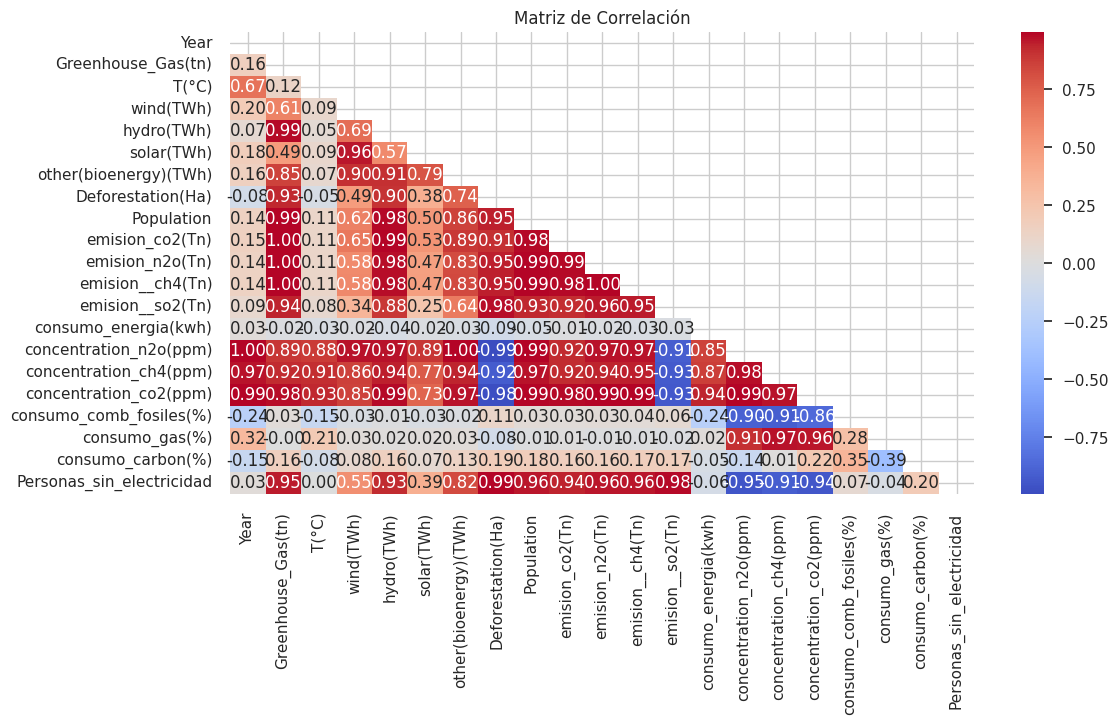

In [434]:
# Calcular la matriz de correlación solo para columnas numéricas
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Mostrar la matriz de correlación
#print(correlation_matrix)

# Crear una máscara para la mitad superior del heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Matriz de Correlación')
plt.show()

#Esta es la correlacion tipo Pearson (evalua relacion lineal).

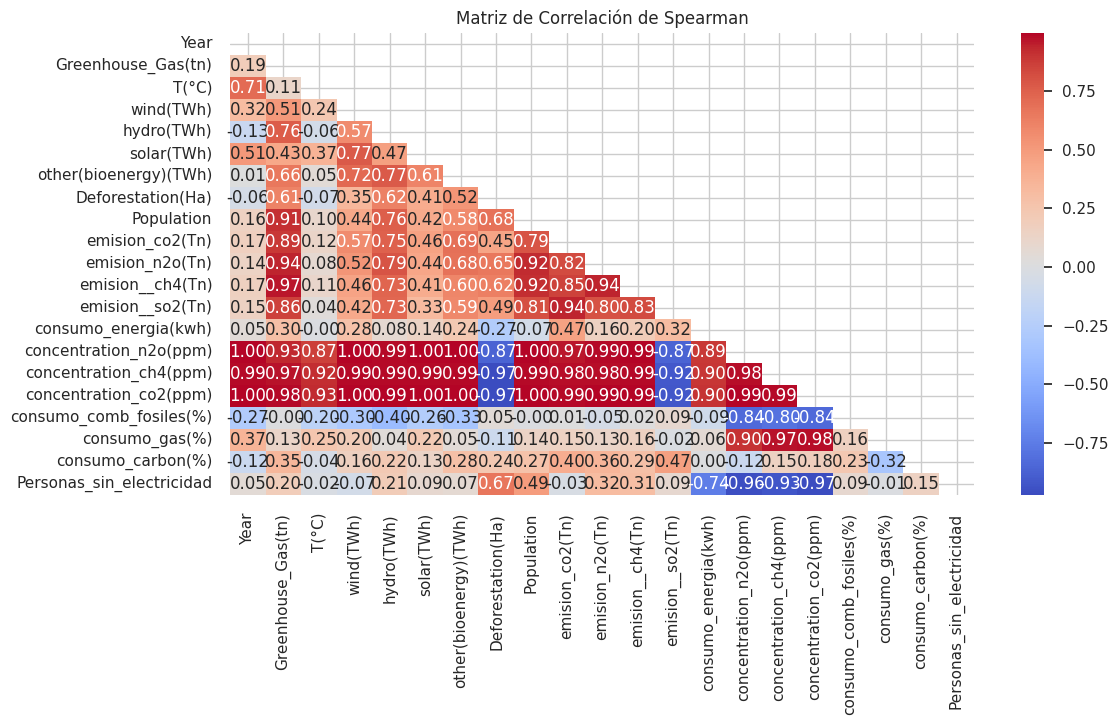

In [435]:
# Correlación de Spearman:
 # Es una medida no paramétrica que evalúa la relación monótona (no necesariamente lineal) entre dos variables.
 # Ideal para datos ordinales o para datos que no cumplen con los supuestos de normalidad.

# Calcular la matriz de correlación de Spearman solo para columnas numéricas
correlation_matrix = df.select_dtypes(include=np.number).corr(method='spearman')

# Crear una máscara para la mitad superior del heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Matriz de Correlación de Spearman')
plt.show()

**Posibles analisis y modelos**

1. Análisis de Regresión
Regresión Lineal Múltiple: utilizar variables como Greenhouse_Gas(tn), Population, y consumo_energia(kwh) para predecir T(°C).

------

2. Análisis de Componentes Principales (PCA)
PCA: Para reducir la dimensionalidad del dataset mientras retienes la mayor parte de la variabilidad.

-----

3. Análisis de Clustering
KMeans Clustering: Agrupa los países o entidades en función de características energéticas y ambientales.

-----

4. Análisis de Series Temporales
Modelos de Series Temporales: Para analizar cómo cambian las variables a lo largo del tiempo, como T(°C) y emision_co2(Tn).

-----

5. Modelos de Aprendizaje Automático
Modelos Supervisados: Como árboles de decisión o random forests para predicción y clasificación.

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26443 entries, 0 to 26442
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     26443 non-null  object 
 1   Year                       26443 non-null  int64  
 2   Greenhouse_Gas(tn)         18555 non-null  float64
 3   T(°C)                      17079 non-null  float64
 4   wind(TWh)                  8706 non-null   float64
 5   hydro(TWh)                 9532 non-null   float64
 6   solar(TWh)                 8674 non-null   float64
 7   other(bioenergy)(TWh)      8898 non-null   float64
 8   Deforestation(Ha)          539 non-null    float64
 9   Population                 19439 non-null  float64
 10  emision_co2(Tn)            17795 non-null  float64
 11  emision_n2o(Tn)            16775 non-null  float64
 12  emision__ch4(Tn)           16405 non-null  float64
 13  emision__so2(Tn)           17274 non-null  flo

# Regresión Lineal Múltiple:





Tomo como variable a predecir la T°c (Y) y las variables independientes (features): Concentaciones de gases en la atmosfera (Dioxido de carbono, metano y oxido nitroso) (X1;x2;x3).

In [437]:
# Usando biblioteca scikit-learn #


from sklearn.model_selection import train_test_split

# Selección de variables
X = df[[ 'concentration_co2(ppm)','concentration_ch4(ppm)','concentration_n2o(ppm)']]
y = df['T(°C)']

# Eliminar filas con valores faltantes en X e y simultáneamente
df_cleaned = df[['concentration_co2(ppm)', 'concentration_ch4(ppm)', 'concentration_n2o(ppm)','T(°C)']].dropna()
X = df_cleaned[[ 'concentration_co2(ppm)', 'concentration_ch4(ppm)','concentration_n2o(ppm)']]
y = df_cleaned['T(°C)']  # Variable dependiente/a predecir o target.

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% de los datos para entrenamiento.
                                                                                          # #random_state=4 Si fijamos este lugar siempre da los mismos valores aleatorios. Esto se llama "plantar/fijar una semilla aleatoria"

#Nos va a tirar datos aleatorios cada vez que lo llamemos, segun el porcentaje que coloquemos en "test_size=". Ejemplo: 0.3 toma el 30% de los datos para test set.
#Cada vez que lo haga me tomara valores distintos aleatorios, esto se llama reproducibilidad de un experimiento.


# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Train R2=", r2)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Train R2= 0.8305426757733156
Mean Squared Error (MSE): 0.014359585206407911
Mean Absolute Error (MAE): 0.09650904315586578
Root Mean Squared Error (RMSE): 0.11983148670699163


In [438]:
# RESUMEN ESTADISTICO DE OLS (regresión ordinaria de mínimos cuadrados - statsmodels)
# Importante para obtener el R2, el P-value, Durbin-Watson... N° de observaciones,


import statsmodels.api as sm

# tenemos las variables independientes y dependientes
X = df_cleaned[['concentration_co2(ppm)', 'concentration_ch4(ppm)', 'concentration_n2o(ppm)']]
y = df_cleaned['T(°C)']

# Agregar una constante a la matriz de características (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo
ols_model = sm.OLS(y, X).fit()

# Obtener el resumen de los resultados
results_summary = ols_model.summary()

# Mostrar el resumen
print(results_summary)

                            OLS Regression Results                            
Dep. Variable:                  T(°C)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     371.4
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.02e-97
Time:                        02:38:33   Log-Likelihood:                 181.83
No. Observations:                 285   AIC:                            -355.7
Df Residuals:                     281   BIC:                            -341.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [439]:
# El Mean Squared Error (MSE) es una métrica que mide el promedio de los errores cuadrados entre
   #los valores reales y las predicciones del modelo. En otras palabras, calcula la media del cuadrado
   #de las diferencias entre los valores predichos y los valores reales.
   #El MSE es útil para identificar la precisión de un modelo; un valor más bajo indica un modelo más preciso.
   #Es una métrica útil para evaluar la dispersión de los errores, aunque puede ser menos intuitiva debido a que está en unidades cuadradas.

# El Root Mean Squared Error (RMSE) es simplemente la raíz cuadrada del MSE. Tiene la misma unidad que
  #la variable dependiente, lo que la hace más interpretable.
  #El RMSE te da una idea de cuánto se desvía, en promedio, la predicción del valor real.
  #Un RMSE más bajo indica un mejor ajuste del modelo
  #Los valores predichos por tu modelo se desvían del valor real por aproximadamente 0.119831 grados Celsius.
  #Un valor de RMSE más cercano a 0 sugiere que el modelo está prediciendo bastante bien.

  # R2 mide lo bien que un modelo de regresión se ajusta a los datos reales. En otras palabras, se trata de una medida de la precisión general del modelo.
   #R al cuadrado es también conocido como el coeficiente de determinación.
   #El valor varía de 0 a 1 (o de 0% a 100%), donde un valor más alto significa que el modelo explica mejor la variabilidad de los datos observados en relación
    #a la línea de regresión ajustada.

R² (Coeficiente de Determinación):

Train R2 = 0.8305: Este valor nos indica qué porcentaje de la variabilidad en la variable dependiente (T(°C)) se puede explicar por las variables independientes (concentraciones de CO2, CH4, y N2O) en el modelo de entrenamiento.

Un R² de 0.8305 sugiere que aproximadamente el 83.05% de la variabilidad de la temperatura puede ser explicada por las concentraciones de estos gases, lo cual indica un modelo bastante fuerte.

Mean Squared Error (MSE):

MSE = 0.0144: El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores predichos por el modelo y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo. En este caso, el MSE es bastante bajo, lo cual es positivo.

Root Mean Squared Error (RMSE):

RMSE = 0.1198: El RMSE es la raíz cuadrada del MSE y nos da una idea de la magnitud promedio de los errores en las mismas unidades que la variable dependiente (en este caso, grados Celsius). Un RMSE de 0.1198 sugiere que, en promedio, las predicciones del modelo tienen un error de aproximadamente 0.119 grados Celsius.

En resumen:

El modelo de regresión lineal múltiple parece tener un buen desempeño en la predicción de la temperatura basada en las concentraciones de CO2, CH4 y N2O.

Los errores de predicción son relativamente bajos, lo cual es una buena señal de precisión.

------------

**Interpretación de los Valores p**:

Constante: Un valor p de 0.000 indica que la constante es estadísticamente significativa.

concentration_co2(ppm): Un valor p de 0.007 indica que esta variable independiente es significativa al nivel de 0.05 (5%).

concentration_ch4(ppm): Un valor p de 0.000 también indica que esta variable es altamente significativa.

concentration_n2o(ppm): Un valor p de 0.092 indica que esta variable no es significativa al nivel de 0.05, pero podría considerarse marginalmente significativa si se usa un nivel de significación más alto (por ejemplo, 0.10).

Conclusión:
Los valores de p  ayudan a determinar la significancia estadística de cada variable en el modelo de regresión.


Generalmente, un valor p menor a 0.05 indica que see puede rechazar la hipótesis nula (que el coeficiente es igual a cero) y concluir que la variable tiene un efecto significativo en la variable dependiente (en este caso, T°C).

------------

**El valor de Durbin-Watson (DW)** es un estadístico utilizado para detectar la autocorrelación de los residuos en un modelo de regresión. Esto se basa en evaluar si los errores (residuos) del  modelo son independientes entre sí, lo cual es una suposición importante en los modelos de regresión.

Valores de DW: El valor de Durbin-Watson oscila entre 0 y 4.
DW ≈ 2: Indica que no hay autocorrelación en los residuos. Este es el valor ideal para verificar que los errores son independientes.
DW < 2: Indica cierta autocorrelación positiva. Esto significa que los residuos tienden a ser positivos o negativos en secuencia, lo que sugiere que hay una correlación entre los errores.
DW > 2: Indica autocorrelación negativa. Esto significa que cuando un error es positivo, es probable que el siguiente sea negativo, y viceversa.

**RESULTADO**:
Con un valor de Durbin-Watson de 0.154, está bastante cerca de 0, lo que sugiere una fuerte autocorrelación positiva entre los residuos.


In [440]:
### VALIDACION CRUZADA ####
 # Lo realizo sobre el conjunto de datos de entrenamiento.

from sklearn.model_selection import cross_val_score

# Calcular la validación cruzada
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f'Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation: {rmse_scores.std()}')


Scores: [0.15335553 0.11372592 0.11586044 0.12890906 0.12974855 0.10940188
 0.12873071 0.1333116  0.16196708 0.15869284]
Mean RMSE: 0.13337036103620367
Standard Deviation: 0.01783240521245515


**La validación cruzada** es una técnica útil para evaluar el rendimiento de un modelo de aprendizaje automático de manera más robusta, dividiendo los datos en varios subconjuntos y entrenando y evaluando el modelo en cada uno de ellos.

Los valores de Scores representan los errores cuadráticos medios (MSE) negativos, que luego se transforman a raíz cuadrada para obtener la RMSE (Root Mean Squared Error) en cada una de las 10 particiones de la validación cruzada.

0.0178324052124551 indica la variabilidad de los RMSE a través de las diferentes particiones. Un valor más bajo sugiere que el rendimiento del modelo es consistente en las diferentes particiones.

El RMSE medio de la validación cruzada (0.13337036103620367) es ligeramente superior al RMSE de la validación simple (0.1198314867069916). Esto podría indicar que la validación cruzada está capturando mejor la variabilidad y es menos optimista sobre el rendimiento del modelo.

**Análisis de supuestos para la regresión lineal múltiple**



1-Linealidad: La relación entre las variables independientes y la variable dependiente es lineal.



2-Independencia de los errores: Los errores no deben estar correlacionados.



3-Homoscedasticidad: La varianza de los errores debe ser constante a lo largo de las predicciones.



4-Normalidad de los errores: Los errores deben estar distribuidos normalmente.

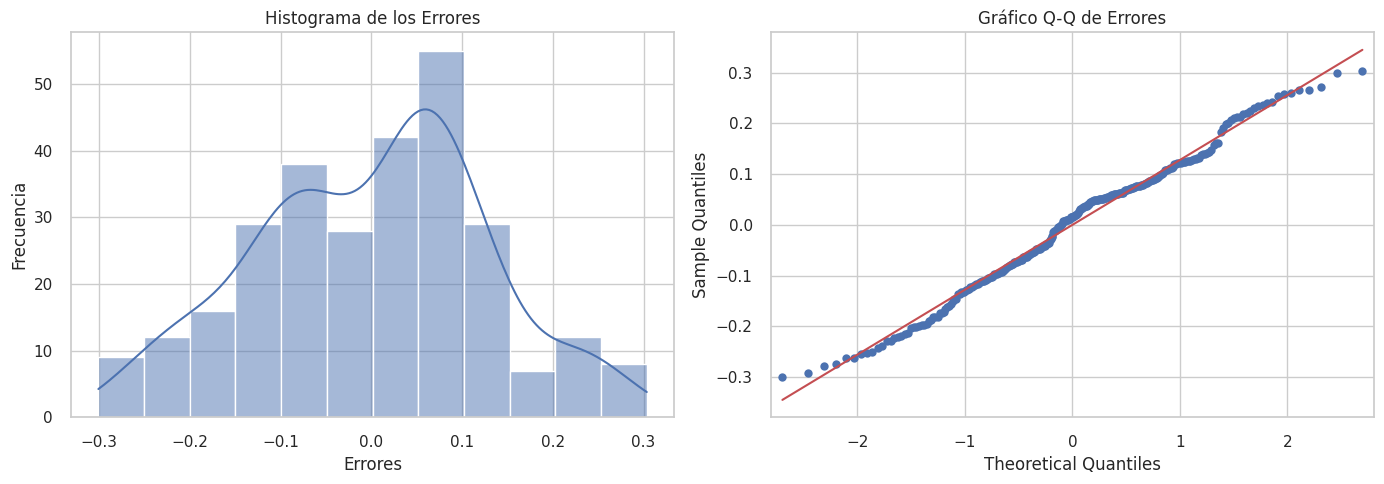

In [441]:
# Verificar la Normalidad de los Errores
residuals = ols_model.resid

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Ajustar tamaño de la figura

# Histograma de los residuos
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histograma de los Errores')
axes[0].set_xlabel('Errores')
axes[0].set_ylabel('Frecuencia')

# Gráfico Q-Q de los errores
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Gráfico Q-Q de Errores')

# Ajustar el layout
plt.tight_layout()
plt.show()

-En el histograma: la mayoría de los residuos están centrados alrededor de 0. Esto es una buena señal, ya que indica que la mayoría de los errores (diferencias entre los valores observados y los valores ajustados) son pequeños.
-El histograma muestra una distribución simétrica alrededor de cero, lo que sugiere que los residuos pueden estar aproximadamente distribuidos de manera normal. Esta simetría se refuerza con la curva de densidad (KDE) superpuesta, que tiene una forma de campana.


Gráfico Q-Q (Quantile-Quantile), que compara los cuantiles de los residuos con los cuantiles de una distribución normal teórica.
La línea roja diagonal representa una referencia ideal donde los residuos seguirían perfectamente una distribución normal.
En el gráfico Q-Q resultante, los puntos siguen de cerca la línea de referencia, lo que indica que los residuos están aproximadamente distribuidos de manera normal. Cuando los puntos se desvían de la línea, indican que los residuos no siguen una distribución normal.

In [442]:
# Aplicamos el Shapiro-Wilk test: (normalidad)
   #La hipotesis nula H0 es que la muestra sigue una distribucion normal (aceptada si p-value>0.05).
   #La hipotesis alternativa Ha es que la muestra no viene de una distribucion normal.
   # Si se rechaza H0, entonces los residuos no son normales.

import scipy.stats as stats
from scipy.stats import shapiro

# Obtener los residuos del modelo
residuos1 = ols_model.resid

# Aplicar el test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos1)

# Mostrar los resultados
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

# Interpretarr el resultado:
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("No se rechaza la hipótesis nula: los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los residuos NO siguen una distribución normal.")

Shapiro-Wilk Test Statistic: 0.9877550376200965
p-value: 0.016222148490912632
Se rechaza la hipótesis nula: los residuos NO siguen una distribución normal.


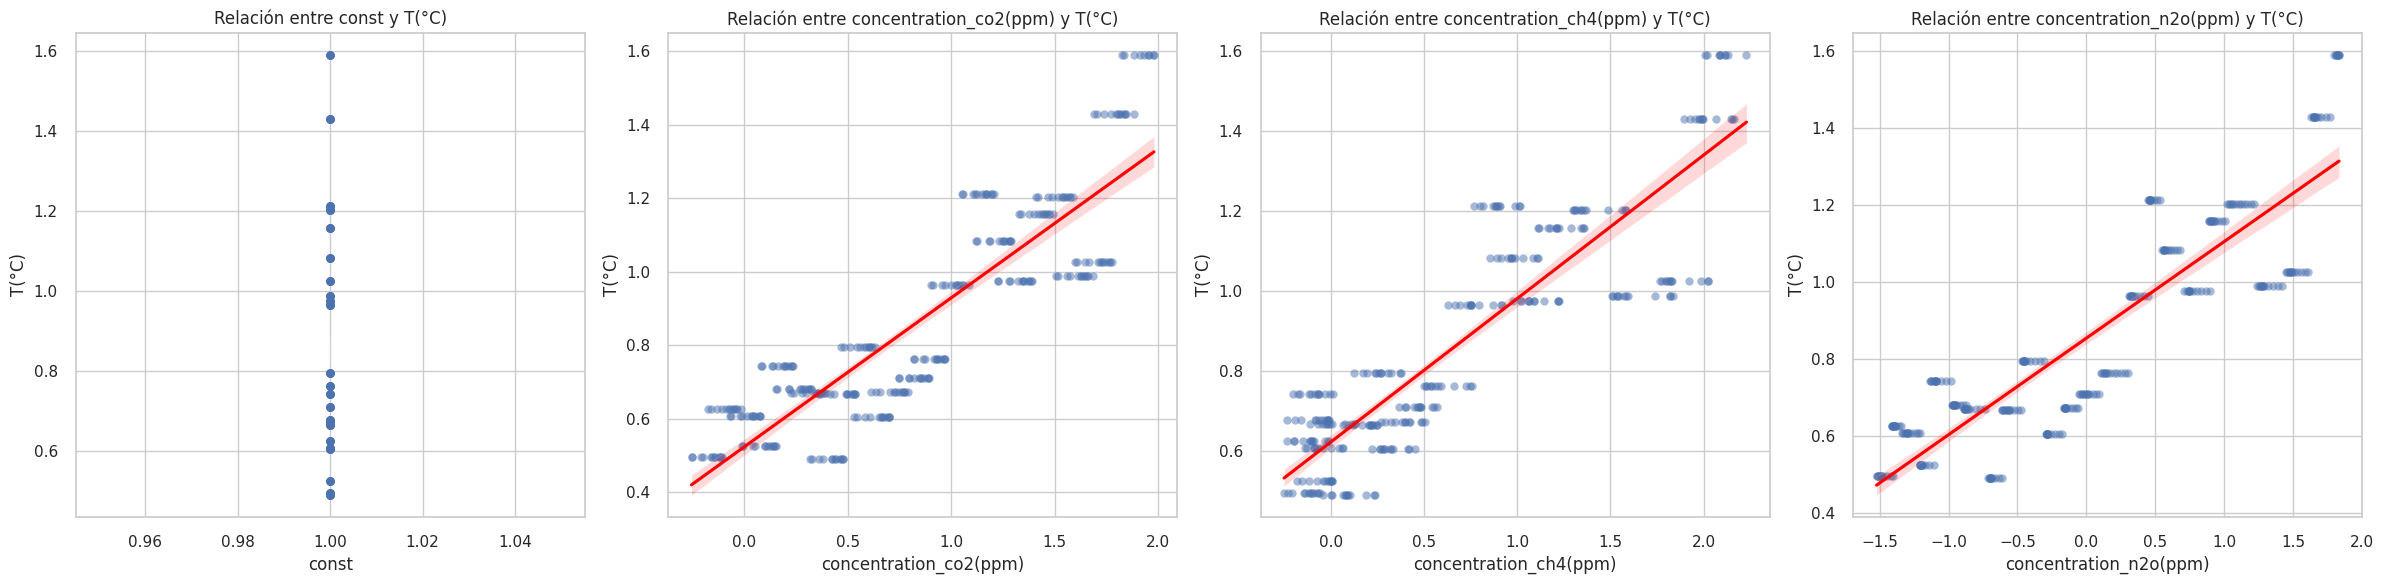

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número de subgráficas según el número de columnas en X
num_vars = X.shape[1]

# Crear una figura con subgráficas
fig, axes = plt.subplots(1, num_vars, figsize=(6 * num_vars, 6))  # Ajusta el tamaño de la figura

# Graficar las relaciones para cada variable independiente
for i, column in enumerate(X.columns):
    # Graficar el scatter plot con la línea de regresión
    sns.regplot(x=X[column], y=y, ax=axes[i], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    axes[i].set_title(f'Relación entre {column} y T(°C)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('T(°C)')

# Ajustar el layout para que no se superpongan elementos
plt.tight_layout()
plt.show()

Esto grafica la relación entre cada variable independiente en el DataFrame X y la variable dependiente y (qu es la temperatura). Esto se hace para cada columna en X, generando gráficos de dispersión (scatter plots).
Este tipo de de gráfico es útil para visualizar la relación entre dos variables continuas y puede ayudar a identificar tendencias, patrones o correlaciones en los datos.

Por ejemplo:
En el grafico de CO2: se puede observar que a medida que la concentración de CO2 aumenta, la temperatura también tiende a aumentar. Esto es evidente por la tendencia ascendente en los puntos de datos. Este patrón puede indica una correlación positiva entre la concentración de CO2 y la temperatura, lo cual es consistente con la teoría de que el aumento de las concentraciones de CO2 en la atmósfera puede llevar a un aumento de las temperaturas globales.
Lo mismo sucede para el Metano (CH4) y Oxido Nitroso (N2O)

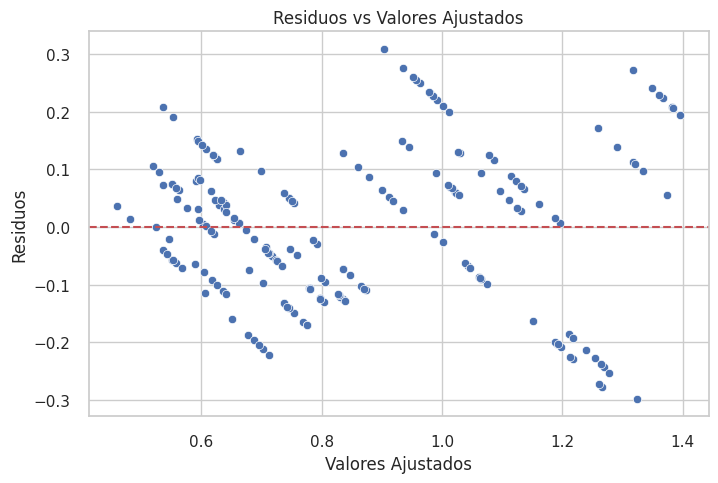

In [444]:
# Verificar la Independencia de los Errores: HOMOSCEDASTICIDAD #

import statsmodels.api as sm

# Ajustar el modelo usando statsmodels para obtener residuos
X_const = sm.add_constant(X_train)  # Agregar constante
model_sm = sm.OLS(y_train, X_const).fit()

# Obtener los residuos
residuals = model_sm.resid

# Graficar los residuos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=model_sm.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

Grafico diseñado para ajustar un modelo de Regresión Lineal Ordinaria (OLS) y graficar los residuos (diferencias entre los valores observados y los valores ajustados) frente a los valores ajustados del modelo.
-Los puntos azules representan los residuos para cada observación. -La línea roja discontinua en y=0 indica la línea de cero residuos.

Evaluar la homocedasticida: esto es ver si los residuos tienen una varianza constante a lo largo de los valores ajustados. Idealmente, los puntos deben estar distribuidos de manera aleatoria alrededor de la línea de cero y no mostrar ningún patrón claro.
La dispersión de los puntos parece relativamente uniforme a lo largo de los valores ajustados. No se observa una tendencia clara de expansión o contracción en la dispersión, lo que indica que la varianza de los residuos podría ser constante.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


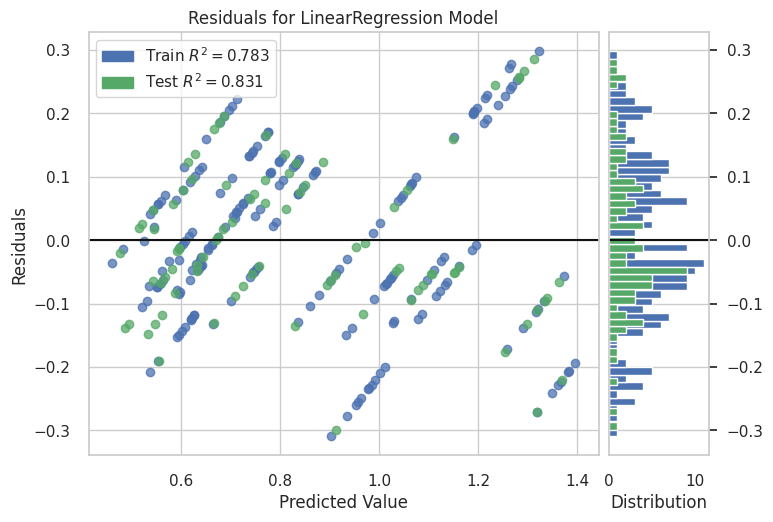

In [445]:
##### Vemos como se distribuyen los residuos

# Opcion con: YellowBrick
#!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot


visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Ajuste los datos de entrenamiento al visualizador
visualizer.score(X_test, y_test)  # Evaluar el modelo en los datos de prueba
visualizer.show()                 # Finalizar y renderizar la figura
plt.show()

El objetivoo es visualizar los residuos (las diferencias entre los valores observados y los valores predichos) tanto para el conjunto de entrenamiento como para el conjunto de prueba. Esto ayud a evaluar el rendimiento del modelo de regresión lineal.

-Los puntos azules representan los residuos para los datos de entrenamiento y los puntoss verdes representan los residuos para los datos de prueba.
-El eje x muestra los valores ajustados por el modelo y el eje y muestra los residuos correspondientes.

Interpretación:
Los residuos están dispersos alrededor de la línea de cero, lo que sugiere que el modelo predice bien en general.
-Los residuos de los datos de pruebaa (verdes) y los residuos de los datos de entrenamiento (azules) están dispersos de manera similar, lo que sugiere que el modelo no está sobreajustado y generaliza bien a nuevos datos.
-Los valores de R² (0.783 para los datos de entrenamiento y 0.831 para los datos de prueba) indican que el modelo explica un porcentaje significativo de la variabilidad en los datos tanto para el entrenamiento como para la prueba.

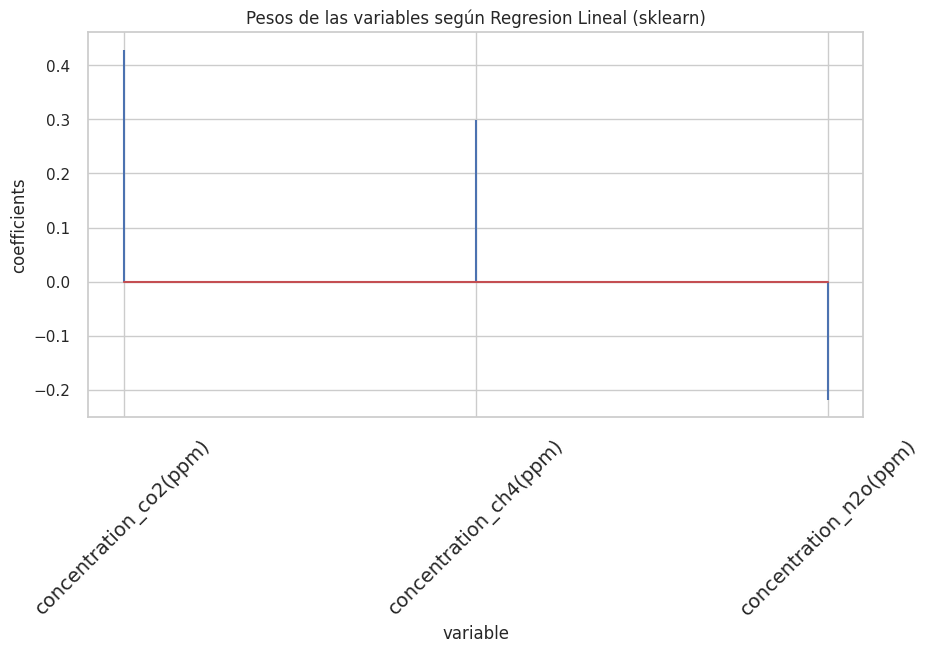

In [446]:
# Interpretar los pesos de los coeficientes mas importantes
# Para esto, voy a graficar los pesos de todos los coeficientes utilizados por el modelo

def plot_coefficients(cdf, technique=None): # Funcion auxiliar para dibujar
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.stem(cdf.index, cdf['Coefficients'], markerfmt=' ')
  ax.set_xlabel('variable')
  ax.set_ylabel('coefficients')
  ax.set_title(technique);
  plt.xticks(rotation=45, fontsize=14)
  plt.show()

cdf = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
plot_coefficients(cdf, "Pesos de las variables según Regresion Lineal (sklearn)")

Interpretación:
concentration_co2(ppm): El coeficiente positivo sugiere una relación directa con la variable dependiente. Un aumento en la concentración de CO2 está asociado con un aumento en la variable dependiente.

concentration_ch4(ppm): El coeficiente cercano a 0 indica que esta variable tiene poco o ningún efecto en la variable dependiente.

concentration_n2o(ppm): El coeficiente negativo sugiere una relación inversa con la variable dependiente. Un aumento en la concentración de N2O está asociado con una disminución en la variable dependiente.

En resumen, la variable concentration_co2(ppm) es la más influyente en tu modelo de regresión lineal, mientras que concentration_n2o(ppm) tiene un impacto negativo

# RANDOM FOREST MODELO

In [447]:
[X_train, y_train, X_test, y_test]

[       concentration_co2(ppm)  concentration_ch4(ppm)  concentration_n2o(ppm)
 26072                1.173388                0.892097                0.461845
 25945                0.082831               -0.178433               -1.107606
 26002                0.614438                0.242745               -0.449399
 26111                1.442006                1.117554                0.905824
 25928                0.140335                0.004707               -1.202301
 ...                       ...                     ...                     ...
 26078                1.057175                0.908824                0.458740
 25961                0.310433               -0.009733               -0.874750
 25996                0.493399                0.246176               -0.495970
 26160                1.738371                1.895290                1.661831
 25992                0.415789                0.062751               -0.603084
 
 [199 rows x 3 columns],
 26072    1.211938
 25945

In [448]:
# Conteo de los números de filas (datos):
print("Número de datos en X_train:", X_train.shape[0])
print("Número de datos en y_train:", y_train.shape[0])
print("Número de datos en X_test:", X_test.shape[0])
print("Número de datos en y_test:", y_test.shape[0])

Número de datos en X_train: 199
Número de datos en y_train: 199
Número de datos en X_test: 86
Número de datos en y_test: 86


In [449]:
# Se plantea el modelado con random forest. Se entiende que el modelo es adecuado en cuanto a su baja sensibilidad hacia
# los outliers, así como la irrelevancia de valores temporales.
# Dada su arquitectura, vinculada a modelos de árbol de decisión, se espera un resultado mejor en cuanto
# a rendimiento, comparado con regresión lineal multivariada.

In [450]:
# Definimos una funcion para hacer un resumen de las metricas del modelo y generar una visualizacion de las predicciones y sus desvios:
def model_report(model, y_train_predicted, y_test_predicted, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):

    # Graficamos el modelo

    plt.plot(y_train, y_train, '-.',c='grey')
    plt.scatter(y_train, y_train_predicted, s=30, c='r', marker='+', zorder=10)
    plt.ylabel("Predicciones de T usando RM")
    plt.xlabel("Valores reales T")
    plt.xlim(0,2.5)
    plt.ylim(0,2.5)
    plt.title('ENTRENAMIENTO - Modelo: ' + model.__class__.__name__
              + '\n Comparación entre el modelo y los valores reales de T', fontsize=17, color='b')
    plt.show()

    plt.plot(y_test, y_test, '-.',c='grey')
    plt.scatter(y_test, y_test_predicted, s=30, c='r', marker='+', zorder=10)
    plt.ylabel("Predicciones de T usando RM")
    plt.xlabel("Valores reales T")
    plt.xlim(0,2.5)
    plt.ylim(0,2.5)
    plt.title('TESTEO  - Modelo: ' + model.__class__.__name__
              + '\n Comparación entre el modelo y los valores reales de T', fontsize=17, color='b')
    plt.show()

    print('METRICAS EN ENTRENAMIENTO: \n')
    print('Error cuadratico medio:             ', np.round(mean_squared_error(y_train, y_train_predicted), 3))
    print('Error absoluto medio:               ', np.round(mean_absolute_error(y_train, y_train_predicted), 3))
    print('Raiz del error cuadratico medio:    ', np.round(np.sqrt(mean_absolute_error(y_train, y_train_predicted)), 3))
    print('R cuadrado:                         ', np.round(model.score(X_train, y_train), 5))

    print('\n METRICAS EN TESTEO: \n')
    print('Error cuadratico medio:             ', np.round(mean_squared_error(y_test, y_test_predicted), 3))
    print('Error absoluto medio:               ', np.round(mean_absolute_error(y_test, y_test_predicted), 3))
    print('Raiz del error cuadratico medio:    ', np.round(np.sqrt(mean_absolute_error(y_test, y_test_predicted)), 3))
    print('R cuadrado:                         ', np.round(model.score(X_test, y_test), 5))

In [451]:
# Importamos modelo Random Forest para regresión

from sklearn.ensemble import RandomForestRegressor

In [452]:
# Instanciamos modelo

rf_reg_model = RandomForestRegressor(criterion = 'squared_error', n_estimators = 50, max_depth = 5, min_samples_split = 30)
# A tener en cuenta que los hiperparámetros por defecto son: n_estimators = 1000, max_depth = 50, min_samples_split = 4.

# Utiliza el error cuadrático medio para evaluar las divisiones.
# n_estimators: Especifica el número de árboles en el bosque. Cuantos más árboles, más robusta será la predicción. Aca hay xx arboles de decision.
# max_depth: limita la profundidad máxima de cada árbol en el bosque. Controla la complejidad de los árboles individuales para evitar el overfitting.
            # En este caso, cada árbol puede tener una profundidad máxima de xx niveles.
# min_samples_split: Define el número mínimo de muestras necesarias para dividir un nodo interno en cada árbol del bosque. Ayuda a prevenir el overfitting al asegurar que las divisiones sean significativas.
                     # Aquí, un nodo debe tener al menos xx muestras para ser dividido.

In [453]:
# Entrenamos modelo

rf_reg_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=30, n_estimators=50)

In [454]:
# Calculamos las predicciones del modelo sobre los datos de entrenamiento

y_train_predicted_rf_reg = rf_reg_model.predict(X_train)

# Y sobre los datos de testeo

y_test_predicted_rf_reg = rf_reg_model.predict(X_test)

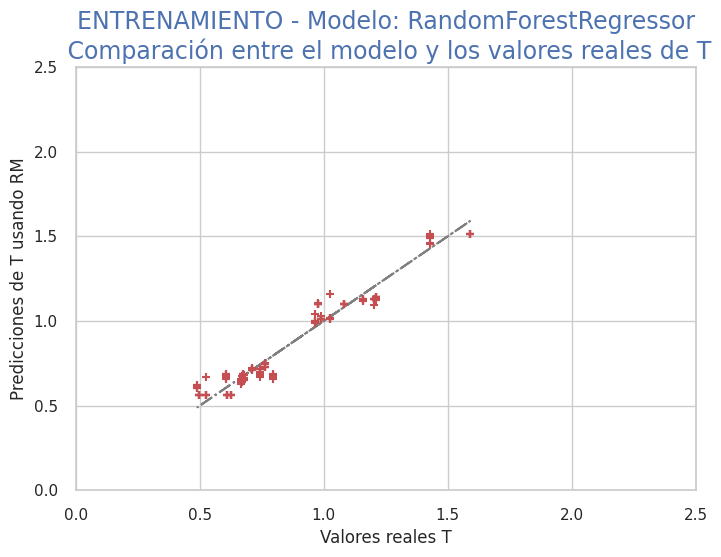

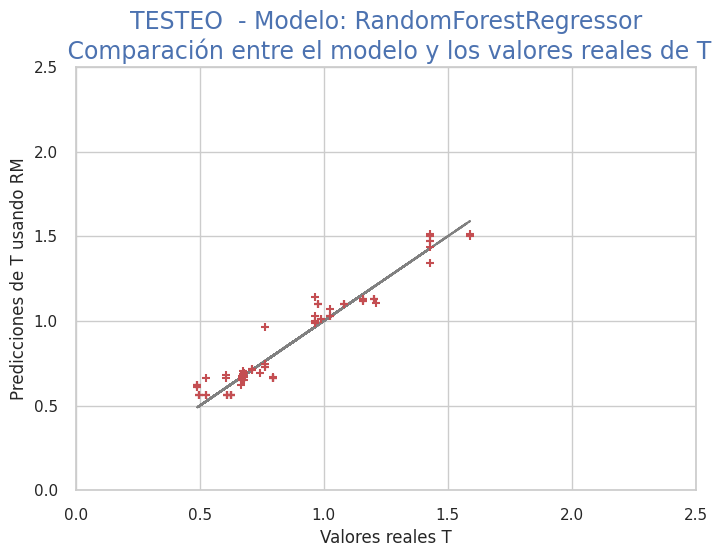

METRICAS EN ENTRENAMIENTO: 

Error cuadratico medio:              0.004
Error absoluto medio:                0.05
Raiz del error cuadratico medio:     0.224
R cuadrado:                          0.9514

 METRICAS EN TESTEO: 

Error cuadratico medio:              0.005
Error absoluto medio:                0.057
Raiz del error cuadratico medio:     0.238
R cuadrado:                          0.9375


In [455]:
# Aplicamos el reporte al modelo de regresion basado en un random forest

model_report(model = rf_reg_model, y_train_predicted = y_train_predicted_rf_reg, y_test_predicted = y_test_predicted_rf_reg)

El modelo captura con más profundidad la vinculación entre la temperatura y los gases de interés.

Se debe destacar el rendimiento del modelo a pesar del escueto conjunto de valores proporcionados a sus hiperparámetros.
Esto nos permite concluir que la relación entre el target y los predictores es sumamente relevante.

-----------------------------
**ALGO DE INTERPRETACION DE RESULTADOS**

**Error Cuadrático Medio (MSE)**

Entrenamiento: 0.004
Testeo: 0.005
El error cuadrático medio mide la media de los errores al cuadrado entre las predicciones del modelo y los valores reales. Un valor más bajo indica que el modelo tiene un mejor ajuste al conjunto de datos. En este caso, ambos valores son bajos, lo que sugiere que el modelo está haciendo buenas predicciones tanto en los datos de entrenamiento como en los de testeo. La diferencia entre ambos valores es baja, por lo que el modelo no está sobreajustado.

**Error Absoluto Medio (MAE)**

Entrenamiento: 0.051
Testeo: 0.059
El error absoluto medio mide la media de las diferencias absolutas entre las predicciones y los valores reales. Al igual que el MSE, valores más bajos indican mejor precisión. La diferencia entre los errores absolutos en entrenamiento (0.051) y testeo (0.059) es baja, esto podria sugerir que el modelo se comporta de manera consistente. Un MAE bajo en ambos conjuntos también indica que las predicciones son generalmente cercanas a los valores reales.

**Raíz del Error Cuadrático Medio (RMSE)**

Entrenamiento: 0.225
Testeo: 0.242
La RMSE es simplemente la raíz cuadrada del MSE y proporciona una medida de error en las mismas unidades que la variable objetivo. Este valor es útil porque ayuda a interpretar la magnitud del error en relación con los valores reales.

**R Cuadrado (R²)**

Entrenamiento: 0.95073
Testeo: 0.9354
El coeficiente de determinación, o R², indica la proporción de la variabilidad en la variable dependiente que puede ser explicada por el modelo. Un valor de R² cercano a 1 indica un buen ajuste. Ambos valores son altos: 0.95073 en el conjunto de entrenamiento y 0.9354 en el conjunto de testeo. Esto indica que el modelo explica aproximadamente el 95% de la variación en el conjunto de entrenamiento y el 93.54% en el conjunto de testeo.

**Conclusiones Generales**

-Consistencia: Los resultados parecen indiicar que el modelo es consistente entre los conjuntos de entrenamiento y testeo. No hay una diferencia significativa entre las métricas, lo que indica que el modelo tiene un buen equilibrio y no está sobreajustado.
-como rinde: Tanto el MSE como el MAE y la RMSE son bajos, lo que implica que el modelo hace predicciones precisas. El alto valor de R² dado indica que el modelo se ajusta bien a los datos.


In [456]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Ajustar el modelo Random Forest
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42) # Se crea un modelo de regresión usando 100 árboles y se entrena con los datos de entrenamiento.
rf_reg_model.fit(X_train, y_train)

# Calcular las predicciones del modelo sobre los datos de entrenamiento
y_train_predicted_rf_reg = rf_reg_model.predict(X_train)

# Y sobre los datos de test
y_test_predicted_rf_reg = rf_reg_model.predict(X_test)

# Reporte del modelo
def model_report(model, y_train_predicted, y_test_predicted):
    print("Entrenamiento Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_predicted))
    print("Entrenamiento Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_train_predicted))
    print("Prueba Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_predicted))
    print("Prueba Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_predicted))

# Generar el informe del modelo
model_report(model=rf_reg_model, y_train_predicted=y_train_predicted_rf_reg, y_test_predicted=y_test_predicted_rf_reg)

# Preparar datos para el análisis OLS
# Usaremos y_test como variable dependiente y y_test_predicted_rf_reg como independiente (predicciones)
y = y_test
X_ols = sm.add_constant(y_test_predicted_rf_reg)  # Agregar constante para OLS

# Ajustar modelo OLS
ols_model = sm.OLS(y, X_ols).fit()

# Obtener y mostrar el resumen de resultados OLS
results_summary = ols_model.summary()
print(results_summary)

Entrenamiento Mean Squared Error (MSE): 0.0004534616651141701
Entrenamiento Mean Absolute Error (MAE): 0.011377283069008618
Prueba Mean Squared Error (MSE): 0.0021803161108047467
Prueba Mean Absolute Error (MAE): 0.026542196134548564
                            OLS Regression Results                            
Dep. Variable:                  T(°C)   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3206.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.10e-68
Time:                        02:38:37   Log-Likelihood:                 141.82
No. Observations:                  86   AIC:                            -279.6
Df Residuals:                      84   BIC:                            -274.7
Df Model:                           1                                         
Covariance Type:            nonrobust                  

In [457]:
######################
# Objetivos del Análisis OLS:

# Evaluar la Relación Entre Variables:
 # OLS se utiliza para entender cómo las predicciones del modelo Random Forest (variable independiente)
 # se relacionan con la variable objetivo real (en este caso, y_test, o la temperatura real).
 # Esto te permite ver cómo bien tu modelo captura las tendencias de la variable dependiente.

# Sirve para obtener Coeficientes: proporciona coeficientes que indican la dirección y magnitud de la relación entre las predicciones y la variable dependiente.

# Evaluar la Bondad del Ajuste: Al mirar el R² del modelo (disponible en el resumen de OLS), puedes evaluar qué tan bien las predicciones
                                # del modelo Random Forest explican la variabilidad en la variable dependiente.

# Comprobar Supuestos del Modelo: OLS permite revisar varios supuestos importantes, como la normalidad de los residuos, homocedasticidad (variabilidad constante de los errores)
                                # y la independencia de los errores.

--------------------

Los valores p son utiles para determinar la significancia estadística de los coeficientes del modelo de random forest en este caso.

**Resultado**:

**Intercepto (const): Valor p: 0.532**
Este valor p es bastante alto (mayor que 0.05), lo que indica que el intercepto no es estadísticamente significativo. No hay evidencia suficiente para afirmar que el intercepto (cuando x1 es 0) tiene un efecto significativo en la variable dependiente T°C.

**Coeficiente de x1: Valor p: 0.000**
Este valor p es muy bajo, lo que sugiere que el coeficiente de x1 es altamente significativo. significa que hay evidencia suficiente para afirmar que x1 tiene un efecto significativo en la variable dependiente T°C.

---------

**Estadístico de Durbin-Watson**
**Valor: 2.389**

Parece que hay una ligera autocorrelación negativa en los residuos, pero NO es tan alta.
(si el valor estadistico está entre 1.5 y 2.5 se considera normal).
Parece que no hay un problema grave de autocorrelación en los residuos.
